In [ ]:
!time pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 26.0 MB/s eta 0:00:00

real	0m15.355s
user	0m8.526s
sys	0m0.754s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# Sexual MFP models

In [ ]:
############################################Sexual data
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


## Molecular Morgan Fingerprint (MFP)

,Smiles,S_Hit,Target,ROMol
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes,1,
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes,1,
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes,1,
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes,1,
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes,1,

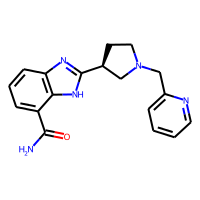
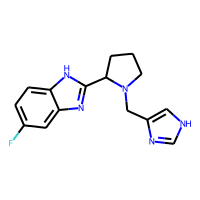
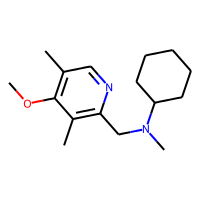
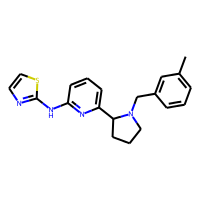
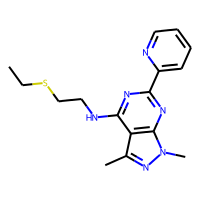

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
sxl.head()

,Smiles,S_Hit,Target,ROMol,Input
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes,1,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes,1,,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes,1,,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No,0,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No,0,,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No,0,,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."

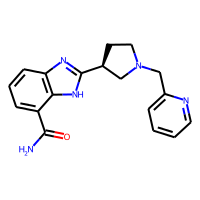
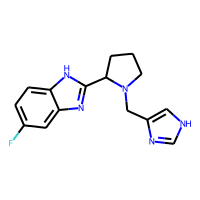
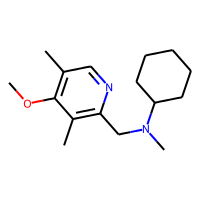
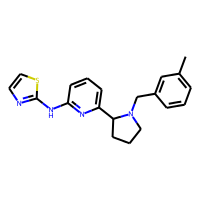
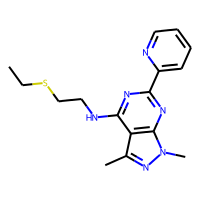
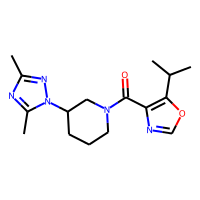
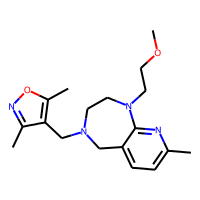
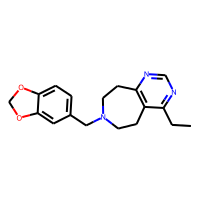
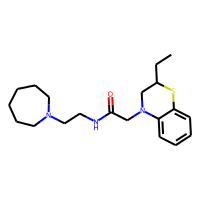
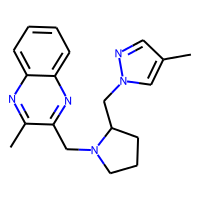

In [ ]:


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


0       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
                              ...                        
9886    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
9887    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
9888    [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
9889    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
9890    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
Name: ROMol, Length: 9891, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9888,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9889,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9888,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9889,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
svc_model = joblib.load('sexualsSVCFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('sexualsRFFinalHPT_UMFP_model5005.pkl')

lr_model = joblib.load('sexualsLRFinalHPT_UMFP_model5005.pkl')

gbm_model = joblib.load('sexualsGBMFinalHPT_UMFP_model5005.pkl')

#CV 5-fold ROC-AUC

<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
/usr/local

[0.27394571 0.19571763 0.16750593 0.15692091 0.14511399 0.13441424
 0.12549048 0.1207545  0.10811712 0.10575574 0.10545527 0.10197328
 0.10110883 0.10110253 0.09964794 0.0975398  0.09543462 0.09123393
 0.08704768 0.08496065 0.08281728 0.07863354 0.0744686  0.06900915
 0.06679577 0.06473081 0.06253655 0.05829087 0.05616187 0.05406191
 0.05264995 0.05056757 0.05056757 0.04849323 0.04642799 0.04642799
 0.04632189 0.04423527 0.04008987 0.03803413 0.03790522 0.03790522
 0.03790522 0.03582288 0.03582288 0.03582288 0.03375208 0.0316951
 0.03157876 0.03157876 0.03161349 0.03161349 0.03161349 0.02736818
 0.02736818 0.02525861 0.02534994 0.02562804 0.02562804 0.02562804
 0.02346224 0.02173913 0.01956522 0.01521739 0.01521739 0.01521739
 0.01304348 0.01304348 0.01304348 0.01086957 0.00869565 0.00869565
 0.00869565 0.00652174 0.00652174 0.00434783 0.00434783 0.00434783
 0.00217391 0.00217391 0.00217391 0.00217391 0.00217391 0.00217391
 0.00217391 0.00217391 0.         0.         0.         0.
 0. 

<ipython-input-42-630cf4fa1cff>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-42-630cf4fa1cff>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter a

[0.27358497 0.2437456  0.22233157 0.1991497  0.19248105 0.18508421
 0.16726173 0.16320786 0.16566517 0.16757345 0.16526568 0.16078354
 0.1556497  0.15117606 0.14853131 0.14447293 0.13754951 0.1370884
 0.13822739 0.13190384 0.12591771 0.12948586 0.12892456 0.11888049
 0.11818795 0.11590261 0.11585667 0.10904105 0.10882499 0.10774245
 0.105845   0.10507417 0.10378147 0.10266953 0.10052889 0.09773023
 0.09494142 0.09216336 0.08930398 0.08638135 0.08347255 0.08057907
 0.07770262 0.0754805  0.07265798 0.07089375 0.06459907 0.06036596
 0.06044183 0.05831399 0.05838316 0.05978108 0.05978108 0.05764901
 0.05552018 0.05552018 0.05339499 0.05408088 0.05012372 0.04477004
 0.043555   0.043555   0.04148199 0.04152636 0.04152636 0.04152636
 0.04215131 0.04215131 0.04002408 0.04002408 0.04002408 0.03996685
 0.03660077 0.03345629 0.03233605 0.03157876 0.03026389 0.02884969
 0.02742752 0.02600952 0.02465077 0.02335861 0.02207214 0.02079243
 0.0195208  0.01825894 0.01700902 0.01577389 0.01449071 0.01317

<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[0.13909194 0.20273063 0.18392983 0.17982901 0.17380835 0.16881528
 0.16460684 0.15822358 0.14449742 0.13051806 0.12215559 0.12419678
 0.11639467 0.1121433  0.10601123 0.09856278 0.08657314 0.0823214
 0.07985429 0.0755922  0.07091436 0.06860573 0.06925702 0.06635594
 0.06753774 0.06340639 0.06349714 0.06139906 0.05721989 0.05925414
 0.05956925 0.05814666 0.05897647 0.05681421 0.05681421 0.05681421
 0.05681421 0.05534464 0.05352273 0.05188965 0.04818746 0.04818746
 0.04603118 0.04387663 0.04387663 0.04446843 0.04446843 0.04043361
 0.03827232 0.03611255 0.03611255 0.03395457 0.03395457 0.03395457
 0.02964562 0.02964562 0.02964562 0.02534994 0.02320938 0.02320938
 0.02107566 0.02107566 0.01895107 0.01474509 0.01267804 0.01267804
 0.01267804 0.01267804 0.01267497 0.01267497 0.01267497 0.01267497
 0.01053783 0.00841954 0.00841954 0.00841954 0.00869565 0.00869565
 0.00869565 0.00869565 0.00869565 0.00652174 0.00652174 0.00652174
 0.00434783 0.00217391 0.         0.         0.         0.
 0. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-42-630cf4fa1cff>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

[0.05534173 0.15552932 0.15447476 0.1494976  0.16855042 0.16413103
 0.15111945 0.1413413  0.14061804 0.13196232 0.1253373  0.12035965
 0.11576623 0.1142144  0.11233494 0.11342957 0.10917331 0.10853361
 0.10729715 0.10741294 0.10385747 0.10506001 0.09957808 0.09660083
 0.09415344 0.09438798 0.09438798 0.09089483 0.09041744 0.08649004
 0.0821406  0.0792864  0.07344221 0.06961298 0.06584818 0.06526217
 0.06526217 0.06337161 0.06337161 0.05995667 0.05995667 0.05995667
 0.05604842 0.05604842 0.05032146 0.04930842 0.04930842 0.04930842
 0.04894067 0.04694579 0.0446178  0.04233019 0.04233019 0.04233019
 0.04008987 0.04002408 0.03790214 0.03790214 0.03578644 0.03578644
 0.03395457 0.03395457 0.03179877 0.03179877 0.02779511 0.02779511
 0.02779511 0.02779511 0.02779511 0.02779511 0.02562804 0.0212981
 0.01913616 0.01913616 0.01697729 0.01697729 0.01697729 0.01482281
 0.01482281 0.01267497 0.01053783 0.00869565 0.00652174 0.00652174
 0.00434783 0.00217391 0.00217391 0.00217391 0.00217391 0.00217

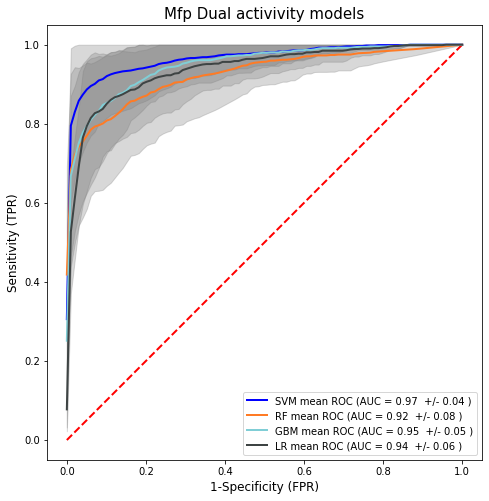

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Mfp Dual activivity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

#Load sexual screening test set

In [ ]:
import pandas as pd
df1= pd.read_csv("sexualsUntrainedTest.csv")
df1

,Unnamed: 0,mol,S_Hit,Smiles
0,25658,<rdkit.Chem.rdchem.Mol object at 0x7fc9363b4c10>,No,Cn1cc(CN2CC[C@@H]3[C@@H](CCC(=O)N3CCc3c[nH]cn3...
1,39559,<rdkit.Chem.rdchem.Mol object at 0x7fc9362189e0>,No,CC1(C)CN=C(N2CCN(CC3CCOC3)CC2)S1
2,36544,<rdkit.Chem.rdchem.Mol object at 0x7fc936195770>,No,COCCC(=O)N1CCN(CC2CC2)c2ccccc21
3,58789,<rdkit.Chem.rdchem.Mol object at 0x7fc935d5bd80>,No,CC(CC(=O)O)CC(=O)Nc1sc2c(c1C(N)=O)CCc1ccccc1-2
4,15213,<rdkit.Chem.rdchem.Mol object at 0x7fc9365e8190>,No,Clc1ccccc1CN1CCc2nc(C3CCCCN3)ncc2C1
...,...,...,...,...
62370,50615,<rdkit.Chem.rdchem.Mol object at 0x7fc935ffa1f0>,No,CC[C@@H](c1ccccc1)n1c(C2CC2)n[nH]c1=O
62371,57063,<rdkit.Chem.rdchem.Mol object at 0x7fc935f145f0>,No,CCn1ncc(S(=O)(=O)N[C@@H]2CC[C@@H](n3ccnc3C)[C@...
62372,19513,<rdkit.Chem.rdchem.Mol object at 0x7fc9364a6ff0>,No,O=C(Nc1ccc(F)cc1)C1CNCCN1C(=O)CC1CCCCC1
62373,41985,<rdkit.Chem.rdchem.Mol object at 0x7fc93607fa00>,No,CNC(=O)CN1CCC(NC(=O)CC(C)CCc2ccccc2)CC1


In [ ]:
compounds = []


for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c9e0>,No,Cn1cc(CN2CC[C@@H]3[C@@H](CCC(=O)N3CCc3c[nH]cn3...
1,<rdkit.Chem.rdchem.Mol object at 0x7f71c322d000>,No,CC1(C)CN=C(N2CCN(CC3CCOC3)CC2)S1
2,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c580>,No,COCCC(=O)N1CCN(CC2CC2)c2ccccc21
3,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c740>,No,CC(CC(=O)O)CC(=O)Nc1sc2c(c1C(N)=O)CCc1ccccc1-2
4,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c7b0>,No,Clc1ccccc1CN1CCc2nc(C3CCCCN3)ncc2C1
...,...,...,...
62370,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d49e0>,No,CC[C@@H](c1ccccc1)n1c(C2CC2)n[nH]c1=O
62371,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4a50>,No,CCn1ncc(S(=O)(=O)N[C@@H]2CC[C@@H](n3ccnc3C)[C@...
62372,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4ac0>,No,O=C(Nc1ccc(F)cc1)C1CNCCN1C(=O)CC1CCCCC1
62373,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4b30>,No,CNC(=O)CN1CCC(NC(=O)CC(C)CCc2ccccc2)CC1


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
#PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
#sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["mol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

,mol,S_Hit,Smiles,Input,Target
33991,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3dc21f0>,No,CC(C)Oc1cccc2c1c(NC(=O)CN(C)C)nn2CC(F)(F)F,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0
68769,<rdkit.Chem.rdchem.Mol object at 0x7fc3b34a7140>,Yes,CCc1c(-c2ccccc2)nc2c(c(C)c(C)n2CCN(C)C)c1N,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
29581,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3efc6d0>,No,Cc1cc(CN(CCCO)c2ccccc2)on1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
13351,<rdkit.Chem.rdchem.Mol object at 0x7fc3b422bed0>,No,CCCc1noc(-c2cn(CC(=O)N(CC)CC)nn2)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0
15429,<rdkit.Chem.rdchem.Mol object at 0x7fc3b4089460>,No,O=C(c1ccccn1)N1CCN(c2cnnc(N3CCCC3)c2)CC1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...
64363,<rdkit.Chem.rdchem.Mol object at 0x7fc3b35e57e0>,No,N#Cc1ccc(C(=O)N(Cc2ccncc2)C2CC2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0
41138,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3ae3ae0>,No,CC1(C(N)=O)CN(CC2CCOCC2)CCO1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0
62527,<rdkit.Chem.rdchem.Mol object at 0x7fc3b3596ab0>,No,N#Cc1ccc(NCCNc2ccc(C(F)(F)F)cn2)nc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
58523,<rdkit.Chem.rdchem.Mol object at 0x7fc3b36e00b0>,No,Cc1noc(CN(C)C(=O)CCn2cnc3ccccc32)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = sxl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


33991    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...
68769    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
29581    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13351    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
15429    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
64363    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...
41138    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...
62527    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
58523    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
43777    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: mol, Length: 62375, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Xt_test = df
Yt_test= sxl["Target"]

##SVC

In [ ]:
import pandas
from sklearn import model_selection
import joblib

# load the model from disk
svc_model = joblib.load('sexualsSVCFinalHPT_UMFP_model5005.pkl')
#result = loaded_model.score(Xt_test, Yt_test)
#print(result)


In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.993058
Recall 0.658120
precision 0.163830
F1 score: 0.262351
ROCAUC score: 0.8259036081725535
Accuracy score: 0.993058116232465
F1 score: 0.262350936967632
Cohens kappa: 0.260129
ROC AUC: 0.825904
[[61865   393]
 [   40    77]]


array([[61865,   393],
       [   40,    77]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

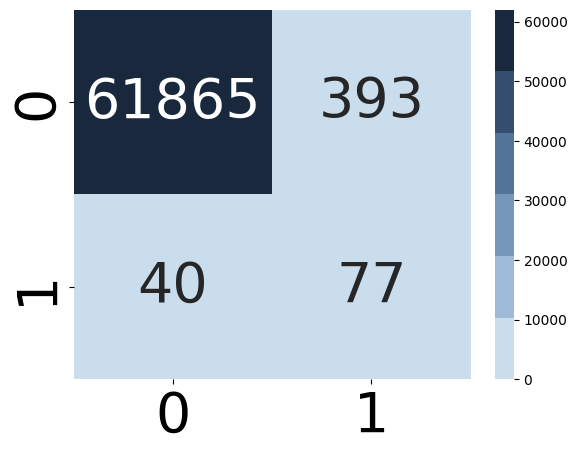

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[61865 ,  393],
 [   40 ,   77]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=62000)# font size
plt.savefig('Dual_SVC_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("Dual_SVC_UB_testMat.png")

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 62375
0    62258
1      117
Name: Target, dtype: int64
[[61865   393]
 [   40    77]]


##RF

In [ ]:
import pandas
from sklearn import model_selection
import joblib

# load the model from disk

rf_model = joblib.load('sexualsRFFinalHPT_UMFP_model5005.pkl')



In [ ]:
rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    62311
1       64
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.998285
Recall 0.316239
precision 0.578125
F1 score: 0.408840
ROCAUC score: 0.6579028185167155
Accuracy score: 0.9982845691382766
F1 score: 0.4088397790055248
Cohens kappa: 0.408055
ROC AUC: 0.657903
[[62231    27]
 [   80    37]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

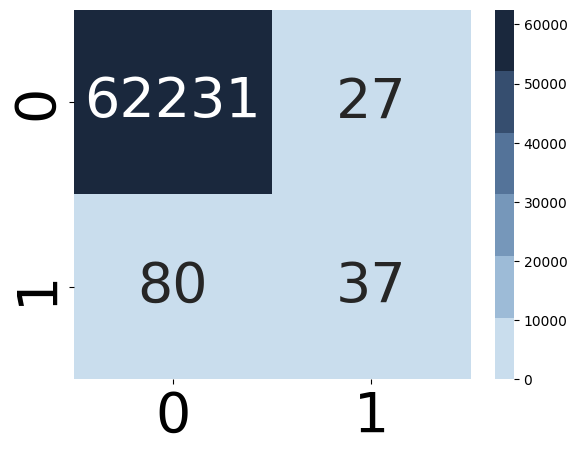

In [ ]:

import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[62231  ,  27],
 [   80 ,   37]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=62500)# font size
plt.savefig('Dual_RF_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("Dual_RF_UB_testMat.png")

##GBM

In [ ]:

gbm_model = joblib.load('sexualsGBMFinalHPT_UMFP_model5005.pkl')

In [ ]:
xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    61992
1      383
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.993940
Recall 0.521368
precision 0.159269
F1 score: 0.244000


array([[61936,   322],
       [   56,    61]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.75809774764126
Accuracy score: 0.993939879759519
F1 score: 0.24399999999999997


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.241821
ROC AUC: 0.758098
[[61936   322]
 [   56    61]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

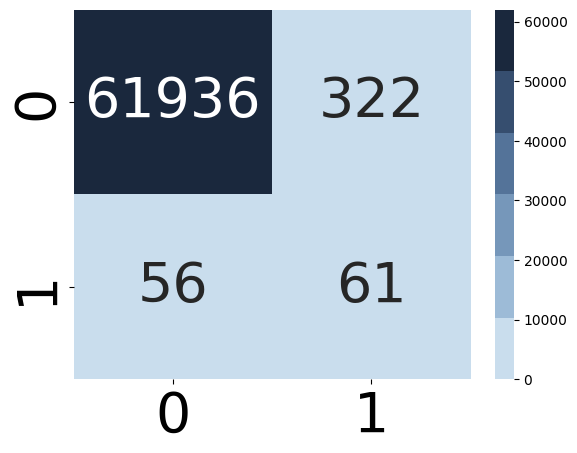

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[61936 ,  322],
 [   56  ,  61]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=62000)# font size
plt.savefig('Dual_GBM_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("Dual_GBM_UB_testMat.png")

##LR

In [ ]:

lr_model = joblib.load('sexualsLRFinalHPT_UMFP_model5005.pkl')

In [ ]:
lrc_predict = lr_model.predict(Xt_test)
p= lrc_predict
p= pd.DataFrame(p)
print(p.value_counts())

0    58494
1     3881
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.938437
Recall 0.675214
precision 0.020356
F1 score: 0.039520


array([[58456,  3802],
       [   38,    79]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.8070726090739584
Accuracy score: 0.938436873747495
F1 score: 0.03951975987993997


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.036009
ROC AUC: 0.807073
[[58456  3802]
 [   38    79]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

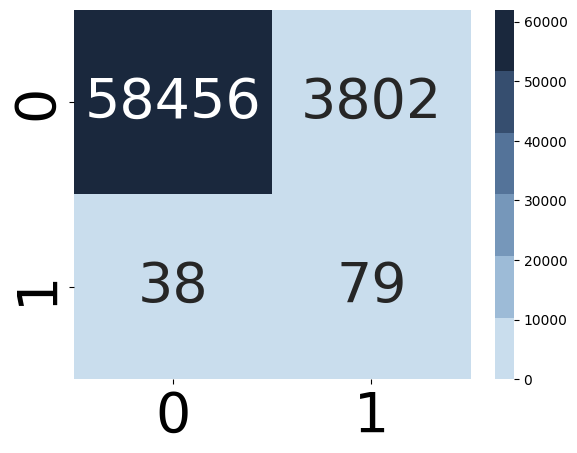

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[58456 , 3802],
 [   38 ,   79]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=62000)# font size
plt.savefig('Dual_LR_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("Dual_LR_UB_testMat.png")

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 62375
0    62258
1      117
Name: Target, dtype: int64
[[58456  3802]
 [   38    79]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.9393 accuracy with a standard deviation of 0.0102


# Graph

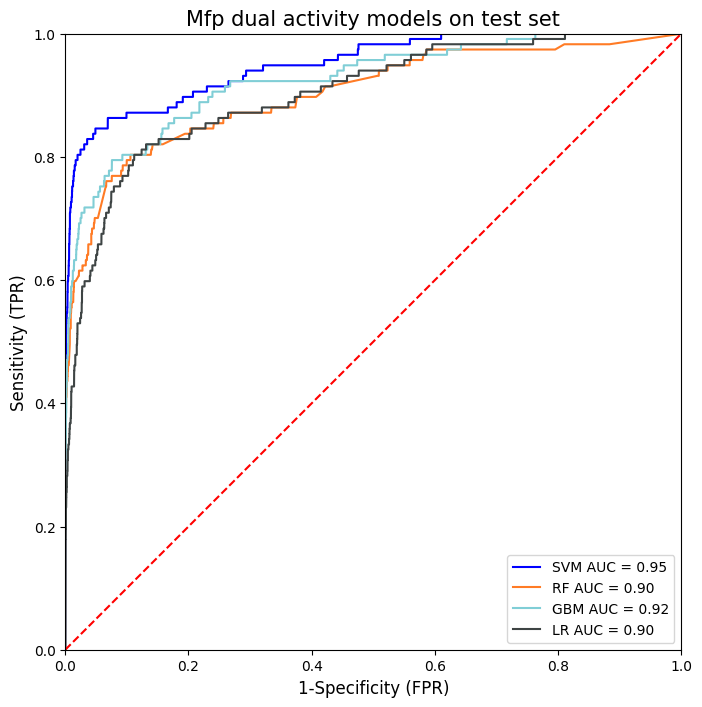

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.4285
0.339
0.3391
0.183


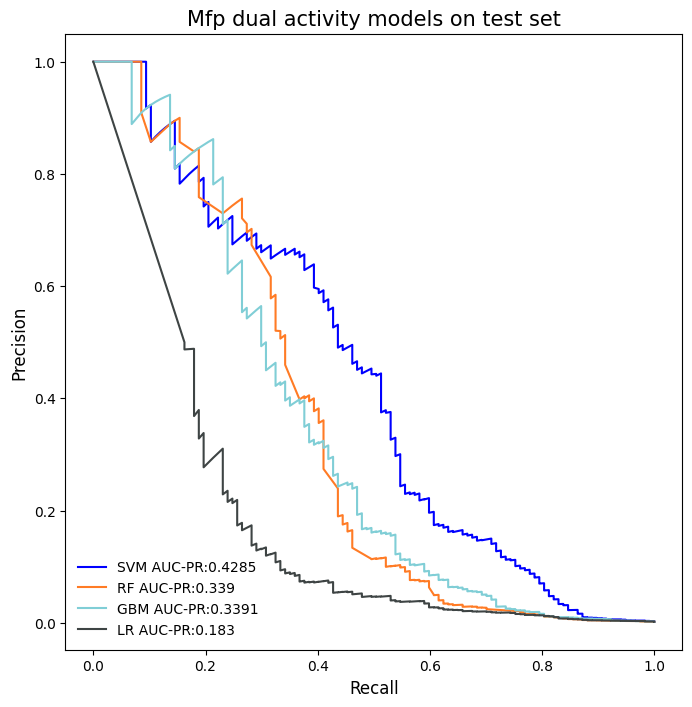

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

#Asexual MFP models

In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.4 MB/s eta 0:00:00

real	0m14.524s
user	0m8.540s
sys	0m1.423s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

from scipy import interp


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit'])
axl=dff
axl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

,mol,Hit
0,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
1,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
2,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
3,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
4,"<img data-content=""rdkit/molecule"" src=""data:i...",Yes
...,...,...
59525,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59526,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59527,"<img data-content=""rdkit/molecule"" src=""data:i...",No
59528,"<img data-content=""rdkit/molecule"" src=""data:i...",No


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= axl["Target"]
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

### SVC

In [ ]:

svc_model = joblib.load('asexualsSVCFinalHPT_UMFP_model5005.pkl')

##RF

In [ ]:

rf_model = joblib.load('asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')

##LR

In [ ]:

lr_model = joblib.load('asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')

##GBM

In [ ]:

gbm_model = joblib.load('asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

#CV 5-fold ROC-AUC

<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))


[1.50310644e-01 5.45295259e-02 4.86448491e-02 4.60768752e-02
 4.12728676e-02 3.76893388e-02 3.40285782e-02 3.22735146e-02
 3.01637725e-02 2.80127631e-02 2.59728190e-02 2.43720427e-02
 2.34482871e-02 2.23852079e-02 2.06480422e-02 1.95063542e-02
 1.77061590e-02 1.73308727e-02 1.73308727e-02 1.73308727e-02
 1.73308727e-02 1.73308727e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72499412e-02
 1.72426438e-02 1.72728113e-02 1.71042412e-02 1.68379464e-02
 1.63051118e-02 1.58231697e-02 1.52491770e-02 1.49295026e-02
 1.45986142e-02 1.42432358e-02 1.38661317e-02 1.29719417e-02
 1.28058573e-02 1.24817335e-02 1.22597747e-02 1.16809647e-02
 1.13069740e-02 1.10443254e-02 1.04850814e-02 1.00363962e-02
 9.53606755e-03 8.501814

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-16-ae0dbcff23d2>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-16-ae0dbcff23d2>:54: DeprecationWarning: scipy.interp is deprecated and will be removed i

[1.07909791e-01 7.83701268e-02 6.46336998e-02 5.66732792e-02
 5.21842845e-02 4.91887285e-02 4.58332817e-02 4.38086157e-02
 4.09560081e-02 3.92087313e-02 3.66198544e-02 3.61845732e-02
 3.35427327e-02 3.24786342e-02 3.06882805e-02 2.97305631e-02
 2.86549181e-02 2.73481311e-02 2.66411461e-02 2.60170431e-02
 2.48546401e-02 2.36117452e-02 2.30360372e-02 2.20989837e-02
 2.09011613e-02 1.96661615e-02 1.91657745e-02 1.86028714e-02
 1.81440565e-02 1.73462697e-02 1.66530327e-02 1.58566741e-02
 1.55602963e-02 1.47257816e-02 1.37106643e-02 1.36798372e-02
 1.34997629e-02 1.30501924e-02 1.27251897e-02 1.18721948e-02
 1.15213552e-02 1.13654269e-02 1.07865185e-02 1.02720419e-02
 9.72962557e-03 9.53778436e-03 9.34105592e-03 9.02013579e-03
 8.64064405e-03 8.44136255e-03 8.08402099e-03 7.68562985e-03
 7.66038351e-03 7.28582208e-03 7.24439245e-03 6.97064837e-03
 6.73925340e-03 6.52854524e-03 6.46571799e-03 6.09007820e-03
 5.75704545e-03 5.23122441e-03 5.10552737e-03 4.95834884e-03
 4.52015452e-03 4.189993

<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[0.03368491 0.11575986 0.11957251 0.11627737 0.11168051 0.10099833
 0.09793039 0.09189208 0.0839137  0.08043682 0.07648013 0.07133917
 0.06725685 0.06506853 0.06184026 0.05923549 0.057771   0.05633103
 0.05398757 0.05241103 0.05135925 0.05082523 0.04949321 0.04756787
 0.04653234 0.04572044 0.04446496 0.04377198 0.04202588 0.04039273
 0.03852527 0.03742804 0.03609522 0.0351111  0.03407289 0.03295261
 0.03224614 0.03109995 0.03007776 0.02959142 0.0287751  0.02805116
 0.02764462 0.02674966 0.02618602 0.02525652 0.02429621 0.02379573
 0.02351165 0.02287589 0.02195587 0.02115194 0.02038627 0.01948853
 0.01846489 0.01803348 0.01760606 0.01710632 0.0162963  0.01513114
 0.01395145 0.01329623 0.01276439 0.01214798 0.01169246 0.01120819
 0.01022399 0.00980554 0.00938584 0.00883906 0.00830875 0.00787782
 0.00753006 0.00716456 0.00649792 0.00572464 0.00542536 0.00537645
 0.00493912 0.00489395 0.00455309 0.00433005 0.00391649 0.00315729
 0.00294395 0.00263247 0.00231276 0.00224048 0.00213862 0.0016

<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))


[0.04929523 0.07471171 0.07316495 0.07400883 0.0696356  0.06567406
 0.06377178 0.05947045 0.05639329 0.05463353 0.05125373 0.05071694
 0.04865021 0.04670933 0.04575826 0.04485379 0.04401086 0.04182283
 0.04070506 0.0395689  0.03874862 0.03804049 0.03694545 0.03621286
 0.03464498 0.03372464 0.03279665 0.03186856 0.0313417  0.0305271
 0.02944285 0.02870974 0.02780405 0.02698289 0.0262602  0.02578405
 0.02463519 0.02417311 0.0236513  0.02286574 0.02225391 0.02179124
 0.02098016 0.02033279 0.01937637 0.01927924 0.018408   0.0178634
 0.01774053 0.0171531  0.01682548 0.0163964  0.01576119 0.0152681
 0.01451937 0.01408171 0.01336004 0.01250985 0.01182142 0.01150014
 0.01092111 0.01054463 0.01012365 0.01004635 0.00962078 0.0094092
 0.00912694 0.00857159 0.00839674 0.00806187 0.0077377  0.00723842
 0.00703897 0.00669815 0.00667908 0.00648111 0.00623902 0.00576775
 0.00507043 0.00470628 0.00446906 0.00429108 0.00381134 0.00323311
 0.00291653 0.00261468 0.0024483  0.00207227 0.00161408 0.00144188

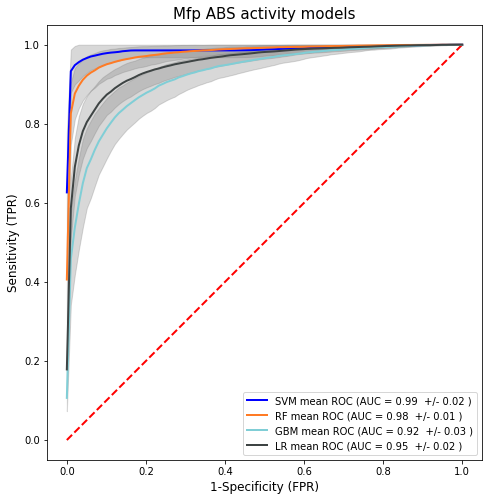

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Mfp ABS activity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

#Load Asexual screening test set

In [ ]:
import pandas as pd
df1= pd.read_csv("asexualsUntrainedTest.csv")
df1

,Unnamed: 0,mol,Hit,Smiles
0,51742,<rdkit.Chem.rdchem.Mol object at 0x7f71149bf680>,No,O=C(NCCCN1CCOCC1)C1CCCN(Cc2ccco2)C1
1,20279,<rdkit.Chem.rdchem.Mol object at 0x7f7114ed6180>,No,Cc1nocc1C(=O)N1CCCC2(CCN(c3cnn(C)c3)C2=O)C1
2,17729,<rdkit.Chem.rdchem.Mol object at 0x7f71219e38b0>,No,Cn1cncc1-c1nnc([C@H]2CCN(Cc3cccnc3)C2)o1
3,28545,<rdkit.Chem.rdchem.Mol object at 0x7f7114dc26c0>,No,CCn1nc(C)c2nc(C(C)C)nc(NCC(C)C)c21
4,24371,<rdkit.Chem.rdchem.Mol object at 0x7f7114f4b140>,No,CN(C)CC1(O)CCCN(Cc2ccccc2OCC(=O)N(C)C)C1
...,...,...,...,...
61024,72080,<rdkit.Chem.rdchem.Mol object at 0x7f7114740cf0>,No,N#Cc1cccc(NC(=O)NC2CCN(CCCCCNC(=O)/C=C/c3ccc(C...
61025,49244,<rdkit.Chem.rdchem.Mol object at 0x7f7114b4a340>,No,NC1(C(=O)NCC2CCCN(Cc3cccc4nonc34)C2)CCC1
61026,47413,<rdkit.Chem.rdchem.Mol object at 0x7f7114afbae0>,No,CNC(=O)C1CCCN(c2nc(-c3ccco3)nc3c2CCNCC3)C1
61027,73164,<rdkit.Chem.rdchem.Mol object at 0x7f711476eb20>,No,CC(Cc1ccc(OC2CCCCC2)cc1)NCC(O)c1cccc(Cl)c1.Cl


In [ ]:
compounds = []


for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl=dff
axl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f7113906500>,No,O=C(NCCCN1CCOCC1)C1CCCN(Cc2ccco2)C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f7113906960>,No,Cc1nocc1C(=O)N1CCCC2(CCN(c3cnn(C)c3)C2=O)C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f7113907680>,No,Cn1cncc1-c1nnc([C@H]2CCN(Cc3cccnc3)C2)o1
3,<rdkit.Chem.rdchem.Mol object at 0x7f71139061f0>,No,CCn1nc(C)c2nc(C(C)C)nc(NCC(C)C)c21
4,<rdkit.Chem.rdchem.Mol object at 0x7f7113906c00>,No,CN(C)CC1(O)CCCN(Cc2ccccc2OCC(=O)N(C)C)C1
...,...,...,...
61024,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2ef80>,No,N#Cc1cccc(NC(=O)NC2CCN(CCCCCNC(=O)/C=C/c3ccc(C...
61025,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2eff0>,No,NC1(C(=O)NCC2CCCN(Cc3cccc4nonc34)C2)CCC1
61026,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2f060>,No,CNC(=O)C1CCCN(c2nc(-c3ccco3)nc3c2CCNCC3)C1
61027,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2f0d0>,No,CC(Cc1ccc(OC2CCCCC2)cc1)NCC(O)c1cccc(Cl)c1.Cl


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
#PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
#sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

#axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

,mol,Hit,Smiles,Target
32262,<rdkit.Chem.rdchem.Mol object at 0x7f1c21ddcba0>,No,CCS(=O)(=O)N1CCC2(CC(=O)N(c3cccc(C)c3)C2)C1,0
22661,<rdkit.Chem.rdchem.Mol object at 0x7f1c23a3f610>,No,Cc1cc(C(=O)CN2C(=O)c3ccccc3CS2(=O)=O)c(C)[nH]1,0
28881,<rdkit.Chem.rdchem.Mol object at 0x7f1c21f3b300>,No,CCn1cc(CNC2CCN(c3cccc(Cl)c3)C2)cn1,0
26053,<rdkit.Chem.rdchem.Mol object at 0x7f1c21ec1310>,No,COc1cc(N2C[C@@H]3COC[C@]3(COCc3ccccn3)C2)ncn1,0
24909,<rdkit.Chem.rdchem.Mol object at 0x7f1c21e957e0>,No,COCc1nc(C(=O)N2CCN(c3nccc(OC)n3)CC2)cs1,0
...,...,...,...,...
82363,<rdkit.Chem.rdchem.Mol object at 0x7f1c21683df0>,No,CCCCNc1c(C(=O)OCC)c(C)nc2c1[nH]c1ccccc12,0
59195,<rdkit.Chem.rdchem.Mol object at 0x7f1c21a80b30>,No,COc1ccc(-c2c[nH]c(C3CC(=O)N(CC(C)C)C3)n2)cc1,0
62561,<rdkit.Chem.rdchem.Mol object at 0x7f1c218a9af0>,No,CN1CCN(C2CCN(CCOc3cccc(Cl)c3)CC2)C1=O,0
18045,<rdkit.Chem.rdchem.Mol object at 0x7f1c23bf86d0>,No,Cc1nc(CCNC(=O)NCC(c2ccco2)N(C)C)cs1,0


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style
print(axl["Target"].value_counts())

0    58241
1     2788
Name: Target, dtype: int64


In [ ]:
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


32262    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
22661    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
28881    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
26053    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
24909    [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...
                               ...                        
82363    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...
59195    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
62561    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
18045    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
30542    [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
Name: mol, Length: 61029, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61024,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61024,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
Xt_test = df
Yt_test= axl["Target"]

In [ ]:
Yt_test

32262    0
22661    0
28881    0
26053    0
24909    0
        ..
82363    0
59195    0
62561    0
18045    0
30542    0
Name: Target, Length: 61029, dtype: int64

### SVC

In [ ]:
import pandas
import joblib

In [ ]:

svc_model = joblib.load('asexualsSVCFinalHPT_UMFP_model5005.pkl')

In [ ]:
svc_model

SVC(probability=True)

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.853234
Recall 0.898852
precision 0.224130
F1 score: 0.358794
ROCAUC score: 0.8749510857238748
Accuracy score: 0.8532337085647806
F1 score: 0.35879447347698473
Cohens kappa: 0.308203
ROC AUC: 0.874951
[[49566  8675]
 [  282  2506]]


array([[49566,  8675],
       [  282,  2506]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

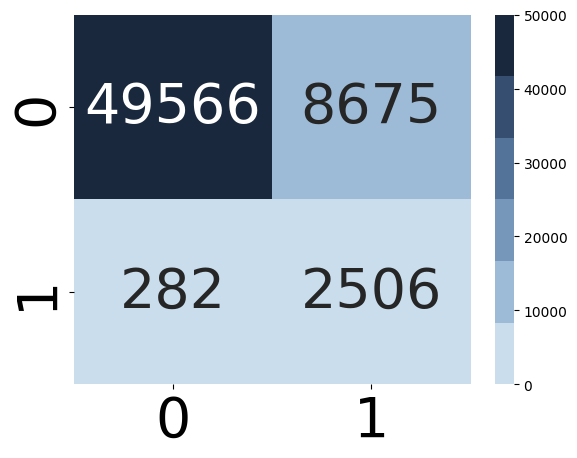

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[49566 , 8675],
 [  282 , 2506]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=50000)# font size
plt.savefig('ABS_SVC_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_SVC_UB_testMat.png")

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 61029
0    58241
1     2788
Name: Target, dtype: int64
[[49566  8675]
 [  282  2506]]


##RF

In [ ]:
import pandas
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')

In [ ]:
rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    48337
1    12692
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.822019
Recall 0.828192
precision 0.181926
F1 score: 0.298320
ROCAUC score: 0.8249578903047612
Accuracy score: 0.8220190401284635
F1 score: 0.29832041343669247
Cohens kappa: 0.241500
ROC AUC: 0.824958
[[47858 10383]
 [  479  2309]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

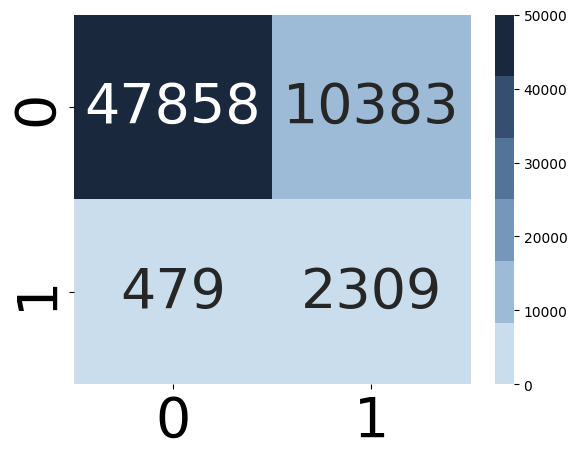

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[47858 ,10383],
 [  479 , 2309]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=50000)# font size
plt.savefig('ABS_RF_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_RF_UB_testMat.png")

##LR

In [ ]:
import pandas
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')

In [ ]:
lrc_predict = lr_model.predict(Xt_test)
p= lrc_predict
p= pd.DataFrame(p)
print(p.value_counts())

1    30822
0    30207
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.537826
Recall 0.969154
precision 0.087665
F1 score: 0.160785


array([[30121, 28120],
       [   86,  2702]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.7431660674685804
Accuracy score: 0.5378262793098363
F1 score: 0.16078548051175245


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.084040
ROC AUC: 0.743166
[[30121 28120]
 [   86  2702]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

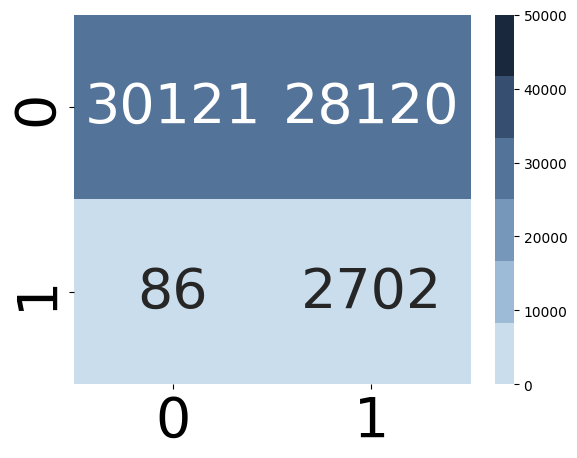

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[30121 ,28120],
 [   86 , 2702]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=50000)# font size
plt.savefig('ABS_LR_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_LR_UB_testMat.png")

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 61029
0    58241
1     2788
Name: Target, dtype: int64
[[30121 28120]
 [   86  2702]]


##GBM

In [ ]:

gbm_model = joblib.load('asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

In [ ]:
xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    45949
1    15080
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.782530
Recall 0.824247
precision 0.152387
F1 score: 0.257220


array([[45459, 12782],
       [  490,  2298]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.8023896931803454
Accuracy score: 0.7825296170672958
F1 score: 0.2572196104768301


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.195158
ROC AUC: 0.802390
[[45459 12782]
 [  490  2298]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

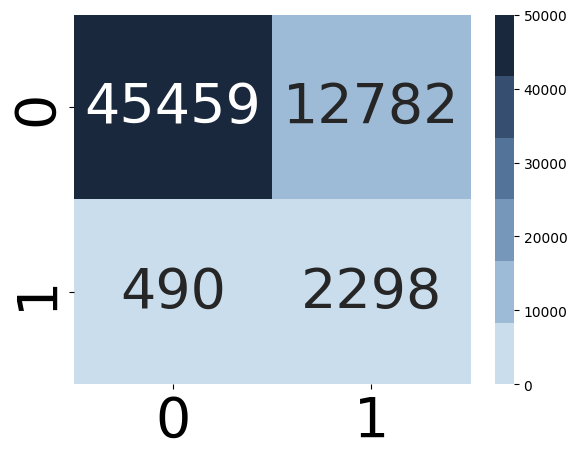

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[45459 ,12782],
 [  490 , 2298]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
#ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=50000)# font size
plt.savefig('ABS_GBM_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_GBM_UB_testMat.png")

# Graph

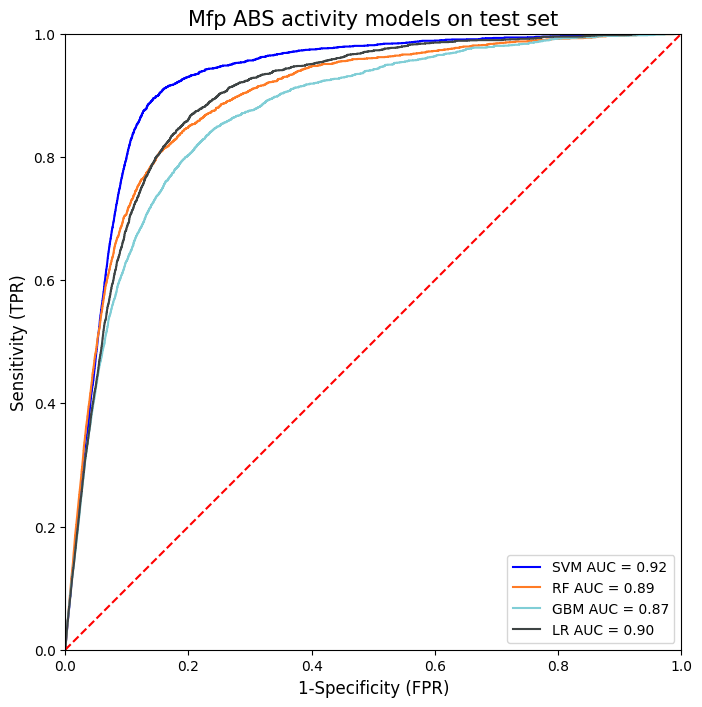

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.295
0.2918
0.2488
0.2634


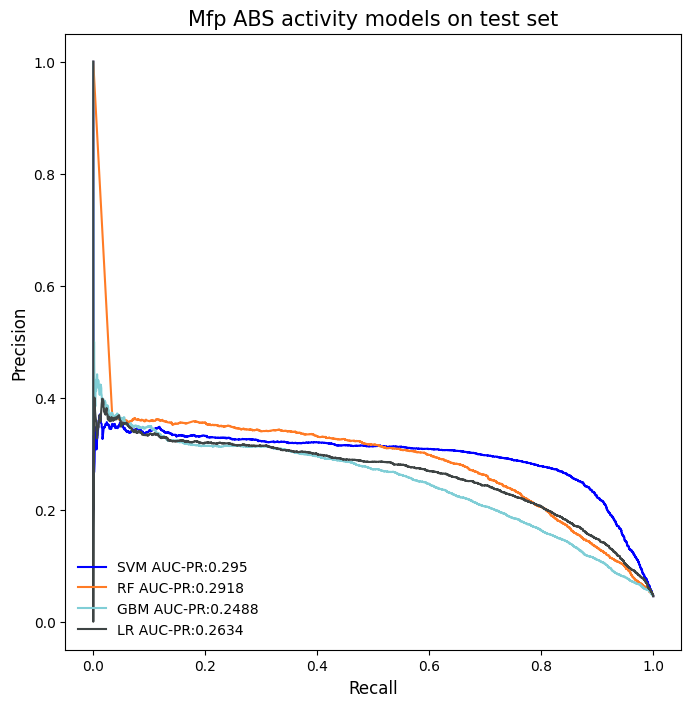

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp ABS activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# Unbalanced MFP modeling

##Sexual models

In [ ]:
import pandas as pd
sxl1= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl1['S_Hit'] = sxl1['S_Hit'].replace(np.nan, "No")
sxl1 = sxl1.iloc[: , 1:]
print(sxl1['S_Hit'].value_counts())
sxl1



/content/drive/MyDrive/PhD/PTS_datasets
No     8975
Yes     916
Name: S_Hit, dtype: int64


,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


In [ ]:
ht= sxl1[sxl1["S_Hit"]== "Yes"]
ht = ht.reset_index(drop=True)
ht

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
911,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...,Yes
912,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...,Yes
913,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...,Yes
914,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...,Yes


In [ ]:
sxl= nhts.append(ht)
sxl = sxl.reset_index(drop=True)
sxl

<ipython-input-9-9d4f6c643dad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sxl= nhts.append(ht)


,Smiles,S_Hit
0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,No
1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,No
2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,No
3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,No
4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,No
...,...,...
69712,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...,Yes
69713,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...,Yes
69714,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...,Yes
69715,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...,Yes


In [ ]:
df_smiles = sxl

In [ ]:
## Compound
compounds = []

df1 = df_smiles. iloc [:176]
for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df2 = df_smiles. iloc [177:637]
for _, compound_key, smiles in df2[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df3 = df_smiles. iloc [638:880]
for _, compound_key, smiles in df3[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df4 = df_smiles. iloc [881:2160]
for _, compound_key, smiles in df4[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df5 = df_smiles. iloc [2161:2662]
for _, compound_key, smiles in df5[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [2663:4273]
for _, compound_key, smiles in df6[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df7 = df_smiles. iloc [4274:8027]
for _, compound_key, smiles in df7[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [8028:8749]
for _, compound_key, smiles in df8[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8750:9132]
for _, compound_key, smiles in df9[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [9133:9993]
for _, compound_key, smiles in df10[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [9994:15541]
for _, compound_key, smiles in df11[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [15544:17608]
for _, compound_key, smiles in df12[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [17609:18039]
for _, compound_key, smiles in df13[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [18040:19840]
for _, compound_key, smiles in df14[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [19841:21008]
for _, compound_key, smiles in df15[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [21009:23464]
for _, compound_key, smiles in df16[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [23465:24399]
for _, compound_key, smiles in df17[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [24400:24499]
for _, compound_key, smiles in df18[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [24500:27475]
for _, compound_key, smiles in df19[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20 = df_smiles. iloc [27476:29517]
for _, compound_key, smiles in df20[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21 = df_smiles. iloc [29518:32330]
for _, compound_key, smiles in df21[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22 = df_smiles. iloc [32331:34028]
for _, compound_key, smiles in df22[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))
df23 = df_smiles. iloc [34029:36109]
for _, compound_key, smiles in df23[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24 = df_smiles. iloc [36110:39916]
for _, compound_key, smiles in df24[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25 = df_smiles. iloc [39917:40726]
for _, compound_key, smiles in df25[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df26 = df_smiles. iloc [40727:42620]
for _, compound_key, smiles in df26[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27 = df_smiles. iloc [42624:42974]
for _, compound_key, smiles in df27[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28 = df_smiles. iloc [42975:45122]
for _, compound_key, smiles in df28[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df29 = df_smiles. iloc [45123:45283]
for _, compound_key, smiles in df29[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30 = df_smiles. iloc [45284:46911]
for _, compound_key, smiles in df30[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31 = df_smiles. iloc [46912:49127]
for _, compound_key, smiles in df31[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32 = df_smiles. iloc [49128:50625]
for _, compound_key, smiles in df32[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33 = df_smiles. iloc [50626:51114]
for _, compound_key, smiles in df33[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34 = df_smiles. iloc [51115:53592]
for _, compound_key, smiles in df34[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35 = df_smiles. iloc [53593:54321]
for _, compound_key, smiles in df35[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36 = df_smiles. iloc [54322:54557]
for _, compound_key, smiles in df36[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37 = df_smiles. iloc [54558:55534]
for _, compound_key, smiles in df37[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38 = df_smiles. iloc [55536:55615]
for _, compound_key, smiles in df38[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39 = df_smiles. iloc [55617:59191]
for _, compound_key, smiles in df39[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40 = df_smiles. iloc [59192:61821]
for _, compound_key, smiles in df40[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41 = df_smiles. iloc [61822:62027]
for _, compound_key, smiles in df41[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42 = df_smiles. iloc [62028:63298]
for _, compound_key, smiles in df42[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43 = df_smiles. iloc [63299:63676]
for _, compound_key, smiles in df43[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44 = df_smiles. iloc [63677:68352]
for _, compound_key, smiles in df44[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45 = df_smiles. iloc [68353:]
for _, compound_key, smiles in df45[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7fc600682a40>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7fc6006827a0>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7fc600682340>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7fc6006828f0>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7fc600682180>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
69661,<rdkit.Chem.rdchem.Mol object at 0x7fc5ffffc820>,Yes,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...
69662,<rdkit.Chem.rdchem.Mol object at 0x7fc5ffffc890>,Yes,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...
69663,<rdkit.Chem.rdchem.Mol object at 0x7fc5ffffc900>,Yes,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...
69664,<rdkit.Chem.rdchem.Mol object at 0x7fc5ffffc970>,Yes,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...


In [ ]:

# shuffle the DataFrame rows
sxl= sxl.sample(frac = 1)
sxl=sxl
sxl

,mol,S_Hit,Smiles
15487,<rdkit.Chem.rdchem.Mol object at 0x7fc600db83c0>,No,Cc1cc(F)cc(S(=O)(=O)NCCCN2CCC(O)CC2)c1
5526,<rdkit.Chem.rdchem.Mol object at 0x7fc600ffd4d0>,No,Cc1ccc(=O)n(CC(=O)N2CCCC(c3nc(C)c(C)s3)C2)n1
53609,<rdkit.Chem.rdchem.Mol object at 0x7fc6008311c0>,No,CCc1nc(N)nc(NCCC(=O)NC2CCCCC2)c1C
10998,<rdkit.Chem.rdchem.Mol object at 0x7fc600ef4660>,No,Oc1cc(C2CCCCN2C2CCCC2)nc(-c2cccnc2)n1
7738,<rdkit.Chem.rdchem.Mol object at 0x7fc60105e420>,No,CCc1nc(Cn2c(=O)n(CC)c3ccccc32)no1
...,...,...,...
52170,<rdkit.Chem.rdchem.Mol object at 0x7fc6007f5700>,No,Cc1cc(C)c(CNC(=O)CC2CCCO2)c(=O)[nH]1
26243,<rdkit.Chem.rdchem.Mol object at 0x7fc600b75460>,No,Cn1c(C2CCCCN2C(=O)CN2CCCC2=O)nc2ccccc21
40353,<rdkit.Chem.rdchem.Mol object at 0x7fc6009dee30>,No,Cc1ccc(C(=O)N2CCCC(c3[nH]ncc3S(C)(=O)=O)C2)s1
60907,<rdkit.Chem.rdchem.Mol object at 0x7fc600076a40>,No,Cc1cccc(C(=O)N2CCC3(CC2)CC(c2ccccc2)C(=O)N3)c1


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
#PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
#sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["mol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

,mol,S_Hit,Smiles,Input,Target
15487,<rdkit.Chem.rdchem.Mol object at 0x7fc600db83c0>,No,Cc1cc(F)cc(S(=O)(=O)NCCCN2CCC(O)CC2)c1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
5526,<rdkit.Chem.rdchem.Mol object at 0x7fc600ffd4d0>,No,Cc1ccc(=O)n(CC(=O)N2CCCC(c3nc(C)c(C)s3)C2)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
53609,<rdkit.Chem.rdchem.Mol object at 0x7fc6008311c0>,No,CCc1nc(N)nc(NCCC(=O)NC2CCCCC2)c1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
10998,<rdkit.Chem.rdchem.Mol object at 0x7fc600ef4660>,No,Oc1cc(C2CCCCN2C2CCCC2)nc(-c2cccnc2)n1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0
7738,<rdkit.Chem.rdchem.Mol object at 0x7fc60105e420>,No,CCc1nc(Cn2c(=O)n(CC)c3ccccc32)no1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...
52170,<rdkit.Chem.rdchem.Mol object at 0x7fc6007f5700>,No,Cc1cc(C)c(CNC(=O)CC2CCCO2)c(=O)[nH]1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
26243,<rdkit.Chem.rdchem.Mol object at 0x7fc600b75460>,No,Cn1c(C2CCCCN2C(=O)CN2CCCC2=O)nc2ccccc21,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
40353,<rdkit.Chem.rdchem.Mol object at 0x7fc6009dee30>,No,Cc1ccc(C(=O)N2CCCC(c3[nH]ncc3S(C)(=O)=O)C2)s1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
60907,<rdkit.Chem.rdchem.Mol object at 0x7fc600076a40>,No,Cc1cccc(C(=O)N2CCC3(CC2)CC(c2ccccc2)C(=O)N3)c1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = sxl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


15487    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5526     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
53609    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10998    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
7738     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
52170    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
26243    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
40353    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
60907    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4368     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
Name: mol, Length: 69666, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69661,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
69663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
69664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69661,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
69663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
69664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

##SVC

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC( probability=True)

svc_model.fit(Xt_train1, Yt_train1)

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.993685
Recall 0.553763
precision 0.953704
F1 score: 0.700680


array([[13743,     5],
       [   83,   103]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))

ROCAUC score: 0.776699875798161
Accuracy score: 0.9936845127027415
F1 score: 0.7006802721088435


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Cohens kappa: 0.697716
ROC AUC: 0.776700
[[13743     5]
 [   83   103]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

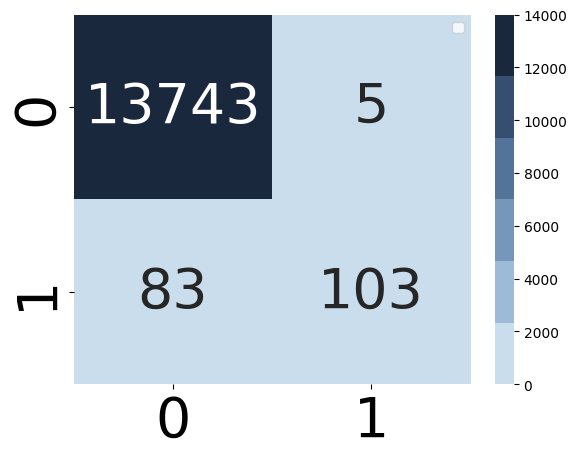

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=14000)# font size
plt.savefig('ABS_SVC_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_SVC_UB_testMat.png")

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 13934
0    13748
1      186
Name: Target, dtype: int64
[[13743     5]
 [   83   103]]


##RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,rfc_predict)
cm

Accuracy: 0.992249
Recall 0.494624
precision 0.867925
F1 score: 0.630137
ROCAUC score: 0.7468026629875392
Accuracy score: 0.9922491746806373
F1 score: 0.6301369863013699
Cohens kappa: 0.626517
ROC AUC: 0.746803
[[13734    14]
 [   94    92]]
Test Set: 13934
0    13748
1      186
Name: Target, dtype: int64
[[13734    14]
 [   94    92]]


array([[13734,    14],
       [   94,    92]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

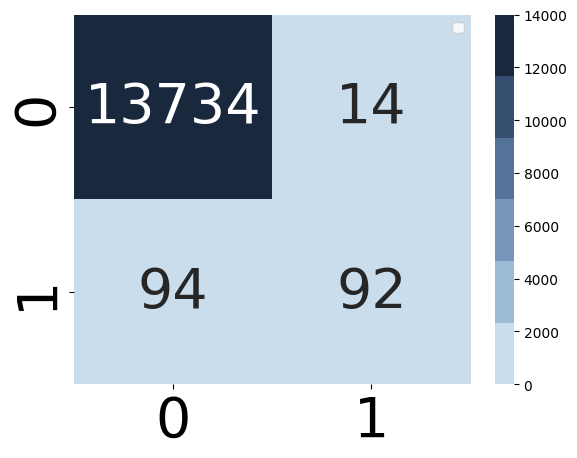

In [ ]:


 import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[13734 ,   14],
 [   94 ,  92]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=14000)# font size
plt.savefig('ABS_RF_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_RF_UB_testMat.png")

##GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.991747
Recall 0.419355
precision 0.917647
F1 score: 0.575646
ROCAUC score: 0.7094228368701138
Accuracy score: 0.9917468063729008
F1 score: 0.5756457564575647
Cohens kappa: 0.572062
ROC AUC: 0.709423
[[13741     7]
 [  108    78]]
Test Set: 13934
0    13748
1      186
Name: Target, dtype: int64
[[13741     7]
 [  108    78]]


array([[13741,     7],
       [  108,    78]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

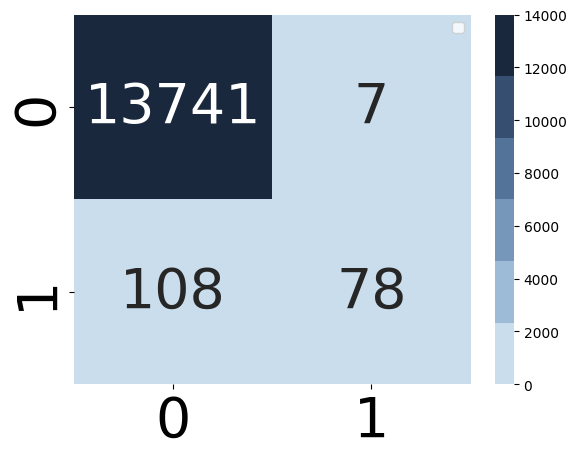

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[13741 ,    7],
 [  108  ,  78]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=14000)# font size
plt.savefig('ABS_GBM_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_GBM_UB_testMat.png")

##LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.980766
Recall 0.709677
precision 0.381503
F1 score: 0.496241
ROCAUC score: 0.8470557594301107
Accuracy score: 0.9807664705038036
F1 score: 0.4962406015037594
Cohens kappa: 0.487339
ROC AUC: 0.847056
[[13534   214]
 [   54   132]]
Test Set: 13934
0    13748
1      186
Name: Target, dtype: int64
[[13534   214]
 [   54   132]]


array([[13534,   214],
       [   54,   132]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

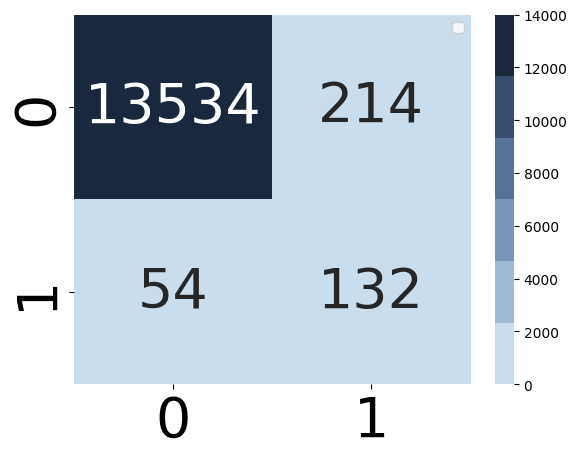

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm=[[13534 ,  214],
 [   54  , 132]]
fig, ax = plt.subplots()
ax.tick_params(labelsize=40)
ax.legend(markerscale=15)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=14000)# font size
plt.savefig('ABS_LR_UB_testMat.png',dpi=300, bbox_inches='tight')
from google.colab import files
files.download("ABS_LR_UB_testMat.png")

In [ ]:
lr_model= lrc
rf_model=rfc
gbm_model= xgbc

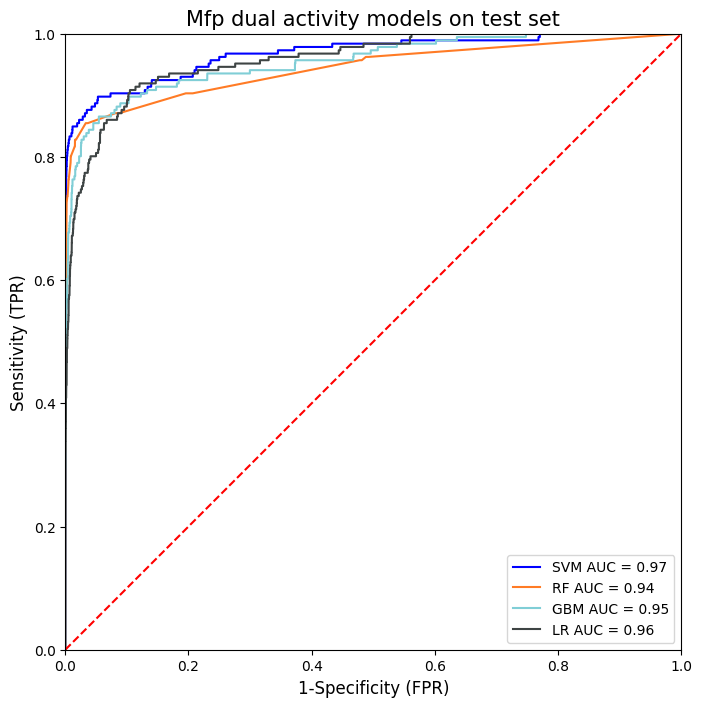

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.824
0.7557
0.6898
0.6085


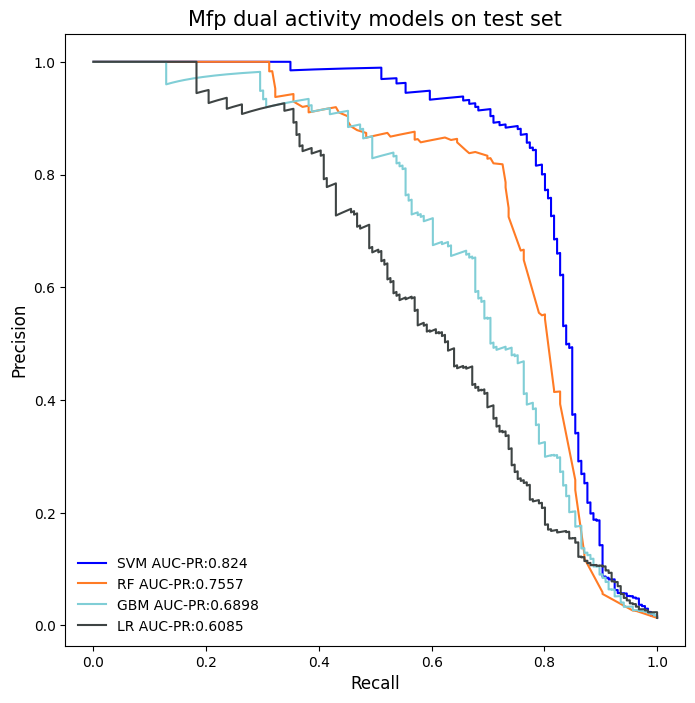

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

## Asexual models

In [ ]:
##Select those not in train set
sxl= pd.read_csv("/content/Merged_asexual_libraries_hits and nonhits_nd.csv")
sxl

,Unnamed: 0,Smiles,CHEMBLID,Hit,Compound Key
0,0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,CHEMBL3470688,No,DDD01082494
1,1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,CHEMBL3447812,No,DDD01058126
2,2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,CHEMBL3486462,No,DDD01257825
3,3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,CHEMBL3467813,No,DDD01078886
4,4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,CHEMBL3452692,No,DDD01063562
...,...,...,...,...,...
122566,122566,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,CHEMBL99,Yes,GNF-Pf-1011
122567,122567,O=[N+]([O-])c1cc([N+](=O)[O-])c2cccnc2c1Nc1ccc...,CHEMBL603032,No,GNF-Pf-1014
122568,122568,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,CHEMBL585033,Yes,GNF-Pf-4623
122569,122569,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,CHEMBL583805,Yes,GNF-Pf-1023


In [ ]:
as_nhts= sxl[sxl["Hit"]== "No"]
print(len(as_nhts))

df_smiles = as_nhts[['Smiles',"Compound Key", "Hit"]]
print(len(df_smiles))
df_smiles

92178
92178


,Smiles,Compound Key,Hit
0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,DDD01082494,No
1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,DDD01058126,No
2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,DDD01257825,No
3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,DDD01078886,No
4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,DDD01063562,No
...,...,...,...
122557,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO,GNF-Pf-3449,No
122558,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1,GNF-Pf-3454,No
122559,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...,GNF-Pf-2736,No
122560,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...,GNF-Pf-2589,No


In [ ]:
## Compound
compounds = []
df1 = df_smiles. iloc [:1300]
df2 = df_smiles. iloc [1301:2600]
df3 = df_smiles. iloc [2601:3900]
df4 = df_smiles. iloc [3901:4300] #note error observed between compounds 4301-4310
df5 = df_smiles. iloc [4310:4600]

for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles  in df2[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df3[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df4[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df5[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df6 = df_smiles. iloc [4650:5600]
for _, compound_key, smiles in df6[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df7 = df_smiles. iloc [5700:6150]
for _, compound_key, smiles in df7[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df8 = df_smiles. iloc [6180:7970]
for _, compound_key, smiles  in df8[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8000:10730]
for _, compound_key, smiles  in df9[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [10740:11410]
for _, compound_key, smiles in df10[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [11420:14010]
for _, compound_key, smiles in df11[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [14020:14580]
for _, compound_key, smiles in df12[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [14590:15794]
for _, compound_key, smiles  in df13[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [15795:18061]
for _, compound_key, smiles  in df14[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [18062:20531]
for _, compound_key, smiles  in df15[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [20532:20964]
for _, compound_key, smiles in df16[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [20966:22471]
for _, compound_key, smiles in df17[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [22473:25150]
for _, compound_key, smiles in df18[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [25153:25549]
for _, compound_key, smiles  in df19[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20= df_smiles. iloc [25551:28743]
for _, compound_key, smiles in df20[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21= df_smiles. iloc [28755:30045]
for _, compound_key, smiles  in df21[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22= df_smiles. iloc [30047:30857]
for _, compound_key, smiles  in df22[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df23= df_smiles. iloc [30859:31442]
for _, compound_key, smiles  in df23[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24= df_smiles. iloc [31444:31831]
for _, compound_key, smiles in df24[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25= df_smiles. iloc [31833:33515]
for _, compound_key, smiles  in df25[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df26= df_smiles. iloc [33517:33577]
for _, compound_key, smiles  in df26[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27= df_smiles. iloc [33579:35623]
for _, compound_key, smiles in df27[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28= df_smiles. iloc [35625:36239]
for _, compound_key, smiles  in df28[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df29= df_smiles. iloc [36240:38411]
for _, compound_key, smiles in df29[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30= df_smiles. iloc [38413:38536]
for _, compound_key, smiles in df30[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31= df_smiles. iloc [38538:39460]
for _, compound_key, smiles in df31[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32= df_smiles. iloc [39462:39880]
for _, compound_key, smiles in df32[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33= df_smiles. iloc [39882:44468]
for _, compound_key, smiles  in df33[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34= df_smiles. iloc [44479:45910]
for _, compound_key, smiles  in df34[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35= df_smiles. iloc [45912:50308]
for _, compound_key, smiles in df35[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36= df_smiles. iloc [50310:50644]
for _, compound_key, smiles in df36[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37= df_smiles. iloc [50646:50847]
for _, compound_key, smiles in df37[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38= df_smiles. iloc [50849:51016]
for _, compound_key, smiles  in df38[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39= df_smiles. iloc [51018:52255]
for _, compound_key, smiles  in df39[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40= df_smiles. iloc [52257:52515]
for _, compound_key, smiles  in df40[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41= df_smiles. iloc [52517:54570]
for _, compound_key, smiles in df41[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42= df_smiles. iloc [54572:56375]
for _, compound_key, smiles in df42[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43= df_smiles. iloc [56377:57950]
for _, compound_key, smiles  in df43[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44= df_smiles. iloc [57952:60363]
for _, compound_key, smiles  in df44[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45= df_smiles. iloc [60365:61892]
for _, compound_key, smiles in df45[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df46= df_smiles. iloc [61894:86486]
for _, compound_key, smiles in df46[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df47= df_smiles. iloc [86488:87067]
for _, compound_key, smiles in df47[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df48= df_smiles. iloc [87069:89383]
for _, compound_key, smiles  in df48[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df49= df_smiles. iloc [89385:90154]
for _, compound_key, smiles in df49[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df50= df_smiles. iloc [90156:90354]
for _, compound_key, smiles in df50[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df51= df_smiles. iloc [90356:90609]
for _, compound_key, smiles  in df51[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df52= df_smiles. iloc [90611:90746]
for _, compound_key, smiles in df52[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df53= df_smiles. iloc [90748:92006]
for _, compound_key, smiles  in df53[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df54= df_smiles. iloc [92008:]
for _, compound_key, smiles  in df54[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

len(compounds)

91817

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
sxl=dff
sxl

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f3290>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2960>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2ab0>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2e30>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f3220>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
91812,<rdkit.Chem.rdchem.Mol object at 0x7f0af4c49b60>,No,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO
91813,<rdkit.Chem.rdchem.Mol object at 0x7f0af4c49bd0>,No,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1
91814,<rdkit.Chem.rdchem.Mol object at 0x7f0af4c49c40>,No,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...
91815,<rdkit.Chem.rdchem.Mol object at 0x7f0af4c49cb0>,No,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...


In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64


,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl2=dff
as_ht= axl2[axl2["Hit"]== "Yes"]

In [ ]:
as_ht

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f0af2bad5b0>,Yes,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f0af2bad2a0>,Yes,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...
2,<rdkit.Chem.rdchem.Mol object at 0x7f0af2bad310>,Yes,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C
3,<rdkit.Chem.rdchem.Mol object at 0x7f0af2bacba0>,Yes,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1
4,<rdkit.Chem.rdchem.Mol object at 0x7f0af2bacd60>,Yes,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1
...,...,...,...
30382,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a27760>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
30383,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a277d0>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
30384,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a27840>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
30385,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a278b0>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:
axl= sxl.append(as_ht)
axl = axl.reset_index(drop=True)
axl

<ipython-input-14-71be01537f27>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  axl= sxl.append(as_ht)


,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f3290>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2960>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2ab0>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f2e30>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f0af53f3220>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a27760>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
122200,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a277d0>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
122201,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a27840>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
122202,<rdkit.Chem.rdchem.Mol object at 0x7f0af4a278b0>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:

# shuffle the DataFrame rows
axl= axl.sample(frac = 1)
axl=axl
axl

,mol,Hit,Smiles
62769,<rdkit.Chem.rdchem.Mol object at 0x7f0af578c970>,No,c1ccc(CN2C[C@@H]3CCCO[C@@H]3[C@H](Nc3ccccn3)C2...
43877,<rdkit.Chem.rdchem.Mol object at 0x7f0af5a3e880>,No,CCC(=O)N1CCC2(CCN(Cc3cccc(F)c3)CC2)CC1
40282,<rdkit.Chem.rdchem.Mol object at 0x7f0af5b9f760>,No,CN(CCCO)c1nc(-c2ccc(C(N)=O)cc2)nc2c1CCNC2
88582,<rdkit.Chem.rdchem.Mol object at 0x7f0af4db0430>,No,CN1C(=O)/C(=C\c2ccccc2Cl)Sc2ccc(C(=O)NC3CCN(Cc...
26128,<rdkit.Chem.rdchem.Mol object at 0x7f0af62f0580>,No,CCOc1ccc(CN(CCOC)c2nc(C)nc3oc(C)nc23)cc1
...,...,...,...
17921,<rdkit.Chem.rdchem.Mol object at 0x7f0af63b1d20>,No,CNc1cc(CNC(=O)c2ccccn2)nc(-c2ccncc2)n1
89307,<rdkit.Chem.rdchem.Mol object at 0x7f0af4dd45f0>,No,COc1ccc(-n2c(CNC(=O)c3cccc4ccccc34)n[nH]c2=S)cc1
95399,<rdkit.Chem.rdchem.Mol object at 0x7f0af65b3d80>,Yes,CCN(CC)c1nc(-c2ccccc2)cc(-c2ccccc2)c1C#N
116995,<rdkit.Chem.rdchem.Mol object at 0x7f0af5723b50>,Yes,c1ccc(-c2ccc(-c3ccccn3)nc2)nc1


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
#PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
#sxl.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

#sxl["Input"] = sxl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

,mol,Hit,Smiles,Target
62769,<rdkit.Chem.rdchem.Mol object at 0x7f0af578c970>,No,c1ccc(CN2C[C@@H]3CCCO[C@@H]3[C@H](Nc3ccccn3)C2...,0
43877,<rdkit.Chem.rdchem.Mol object at 0x7f0af5a3e880>,No,CCC(=O)N1CCC2(CCN(Cc3cccc(F)c3)CC2)CC1,0
40282,<rdkit.Chem.rdchem.Mol object at 0x7f0af5b9f760>,No,CN(CCCO)c1nc(-c2ccc(C(N)=O)cc2)nc2c1CCNC2,0
88582,<rdkit.Chem.rdchem.Mol object at 0x7f0af4db0430>,No,CN1C(=O)/C(=C\c2ccccc2Cl)Sc2ccc(C(=O)NC3CCN(Cc...,0
26128,<rdkit.Chem.rdchem.Mol object at 0x7f0af62f0580>,No,CCOc1ccc(CN(CCOC)c2nc(C)nc3oc(C)nc23)cc1,0
...,...,...,...,...
17921,<rdkit.Chem.rdchem.Mol object at 0x7f0af63b1d20>,No,CNc1cc(CNC(=O)c2ccccn2)nc(-c2ccncc2)n1,0
89307,<rdkit.Chem.rdchem.Mol object at 0x7f0af4dd45f0>,No,COc1ccc(-n2c(CNC(=O)c3cccc4ccccc34)n[nH]c2=S)cc1,0
95399,<rdkit.Chem.rdchem.Mol object at 0x7f0af65b3d80>,Yes,CCN(CC)c1nc(-c2ccccc2)cc(-c2ccccc2)c1C#N,1
116995,<rdkit.Chem.rdchem.Mol object at 0x7f0af5723b50>,Yes,c1ccc(-c2ccc(-c3ccccn3)nc2)nc1,1


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


62769     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
43877     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
40282     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
88582     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
26128     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...
                                ...                        
17921     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
89307     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
95399     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
116995    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
103959    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: mol, Length: 122204, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
122200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
122200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

##SVC

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC( probability=True)

svc_model.fit(Xt_train, Yt_train)



SVC(probability=True)

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
cm

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-496e6297c028>", line 3, in <cell line: 3>
    accuracy = accuracy_score(Yt_test,svc_predict)
NameError: name 'svc_predict' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-9029acafca09>", line 2, in <cell line: 2>
    print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
NameError: name 'svc_predict' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/li

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-5ffbde611cd3>", line 3, in <cell line: 3>
    kappa = cohen_kappa_score(Yt_test, svc_predict)
NameError: name 'svc_predict' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.1

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Test Set: 24441
0    18366
1     6075
Name: Target, dtype: int64
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-d39a7402854a>", line 3, in <cell line: 3>
    print(matrix)
NameError: name 'matrix' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-d39a7402854a>", line 3, in <cell line: 3>
    print(matrix)
NameError: name 'matrix' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py

##RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,rfc_predict)
cm

Accuracy: 0.744200
Recall 0.425626
precision 0.486805
F1 score: 0.454164
ROCAUC score: 0.6380175428870318
Accuracy score: 0.7442003191358783
F1 score: 0.4541644840230487
Cohens kappa: 0.288103
ROC AUC: 0.638018
[[15588  2742]
 [ 3510  2601]]
Test Set: 24441
0    18330
1     6111
Name: Target, dtype: int64
[[15588  2742]
 [ 3510  2601]]


array([[15588,  2742],
       [ 3510,  2601]])

##GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.763962
Recall 0.239895
precision 0.566023
F1 score: 0.336973
ROCAUC score: 0.5892875153897308
Accuracy score: 0.7639621946728857
F1 score: 0.3369727617515228
Cohens kappa: 0.221020
ROC AUC: 0.589288
[[17206  1124]
 [ 4645  1466]]
Test Set: 24441
0    18330
1     6111
Name: Target, dtype: int64
[[17206  1124]
 [ 4645  1466]]


array([[17206,  1124],
       [ 4645,  1466]])

##LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.627716
Recall 0.953690
precision 0.397979
F1 score: 0.561600
ROCAUC score: 0.7363649462574666
Accuracy score: 0.6277157235792317
F1 score: 0.5615996145507107
Cohens kappa: 0.322593
ROC AUC: 0.736365
[[9514 8816]
 [ 283 5828]]
Test Set: 24441
0    18330
1     6111
Name: Target, dtype: int64
[[9514 8816]
 [ 283 5828]]


array([[9514, 8816],
       [ 283, 5828]])

#Sexual MACCS models

#Load sexual screening test set

In [ ]:
import pandas as pd
df1= pd.read_csv("sexualsUntrainedTest.csv")
df1

,Unnamed: 0,mol,S_Hit,Smiles
0,25658,<rdkit.Chem.rdchem.Mol object at 0x7fc9363b4c10>,No,Cn1cc(CN2CC[C@@H]3[C@@H](CCC(=O)N3CCc3c[nH]cn3...
1,39559,<rdkit.Chem.rdchem.Mol object at 0x7fc9362189e0>,No,CC1(C)CN=C(N2CCN(CC3CCOC3)CC2)S1
2,36544,<rdkit.Chem.rdchem.Mol object at 0x7fc936195770>,No,COCCC(=O)N1CCN(CC2CC2)c2ccccc21
3,58789,<rdkit.Chem.rdchem.Mol object at 0x7fc935d5bd80>,No,CC(CC(=O)O)CC(=O)Nc1sc2c(c1C(N)=O)CCc1ccccc1-2
4,15213,<rdkit.Chem.rdchem.Mol object at 0x7fc9365e8190>,No,Clc1ccccc1CN1CCc2nc(C3CCCCN3)ncc2C1
...,...,...,...,...
62370,50615,<rdkit.Chem.rdchem.Mol object at 0x7fc935ffa1f0>,No,CC[C@@H](c1ccccc1)n1c(C2CC2)n[nH]c1=O
62371,57063,<rdkit.Chem.rdchem.Mol object at 0x7fc935f145f0>,No,CCn1ncc(S(=O)(=O)N[C@@H]2CC[C@@H](n3ccnc3C)[C@...
62372,19513,<rdkit.Chem.rdchem.Mol object at 0x7fc9364a6ff0>,No,O=C(Nc1ccc(F)cc1)C1CNCCN1C(=O)CC1CCCCC1
62373,41985,<rdkit.Chem.rdchem.Mol object at 0x7fc93607fa00>,No,CNC(=O)CN1CCC(NC(=O)CC(C)CCc2ccccc2)CC1


In [ ]:
compounds = []


for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c9e0>,No,Cn1cc(CN2CC[C@@H]3[C@@H](CCC(=O)N3CCc3c[nH]cn3...
1,<rdkit.Chem.rdchem.Mol object at 0x7f71c322d000>,No,CC1(C)CN=C(N2CCN(CC3CCOC3)CC2)S1
2,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c580>,No,COCCC(=O)N1CCN(CC2CC2)c2ccccc21
3,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c740>,No,CC(CC(=O)O)CC(=O)Nc1sc2c(c1C(N)=O)CCc1ccccc1-2
4,<rdkit.Chem.rdchem.Mol object at 0x7f71c322c7b0>,No,Clc1ccccc1CN1CCc2nc(C3CCCCN3)ncc2C1
...,...,...,...
62370,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d49e0>,No,CC[C@@H](c1ccccc1)n1c(C2CC2)n[nH]c1=O
62371,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4a50>,No,CCn1ncc(S(=O)(=O)N[C@@H]2CC[C@@H](n3ccnc3C)[C@...
62372,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4ac0>,No,O=C(Nc1ccc(F)cc1)C1CNCCN1C(=O)CC1CCCCC1
62373,<rdkit.Chem.rdchem.Mol object at 0x7f71c43d4b30>,No,CNC(=O)CN1CCC(NC(=O)CC(C)CCc2ccccc2)CC1


## MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

dpchm= sxl
dpchm
dpchm["Target"] = np.where(dpchm["S_Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)

df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62370,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
62371,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
62372,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
62373,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
#Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
Xt_test = df
Yt_test= sxl["Target"]

##SVC

In [ ]:
import pandas
from sklearn import model_selection
import joblib

# load the model from disk
svc_model = joblib.load('sexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')



In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.984080
Recall 0.709402
precision 0.079655
F1 score: 0.143227
ROCAUC score: 0.84699903324819
Accuracy score: 0.9840801603206413
F1 score: 0.14322691975841245
Cohens kappa: 0.140327
ROC AUC: 0.846999
[[61299   959]
 [   34    83]]


array([[61299,   959],
       [   34,    83]])

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 62375
0    62258
1      117
Name: Target, dtype: int64
[[61299   959]
 [   34    83]]


##RF

In [ ]:
import pandas
from sklearn import model_selection
import joblib

# load the model from disk

rf_model = joblib.load('sexualsRF_HPTFinal_UMACCS_model.pkl')



In [ ]:
rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    62024
1      351
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.994709
Recall 0.589744
precision 0.196581
F1 score: 0.294872
ROCAUC score: 0.7926070256855057
Accuracy score: 0.9947094188376754
F1 score: 0.2948717948717949
Cohens kappa: 0.292882
ROC AUC: 0.792607
[[61976   282]
 [   48    69]]


In [ ]:
import pandas
from sklearn import model_selection
import joblib

# load the model from disk

rf_model = joblib.load('sexualsRF_HPTFinal_UMACCS_model.pkl')



In [ ]:

rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

##GBM

In [ ]:

gbm_model = joblib.load('sexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    61896
1      479
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.992818
Recall 0.632479
precision 0.154489
F1 score: 0.248322


array([[61853,   405],
       [   43,    74]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.8129867221951773
Accuracy score: 0.9928176352705411
F1 score: 0.24832214765100669


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.246049
ROC AUC: 0.812987
[[61853   405]
 [   43    74]]


##LR

In [ ]:

lr_model = joblib.load('sexualsLR_HPTFInal_UMACCS_model.pkl')

In [ ]:
lrc_predict = lr_model.predict(Xt_test)
p= lrc_predict
p= pd.DataFrame(p)
print(p.value_counts())

0    57975
1     4400
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.930501
Recall 0.777778
precision 0.020682
F1 score: 0.040292


array([[57949,  4309],
       [   26,    91]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.854282894478532
Accuracy score: 0.930501002004008
F1 score: 0.04029222935576711


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.036772
ROC AUC: 0.854283
[[57949  4309]
 [   26    91]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 62375
0    62258
1      117
Name: Target, dtype: int64
[[57949  4309]
 [   26    91]]


#Graph

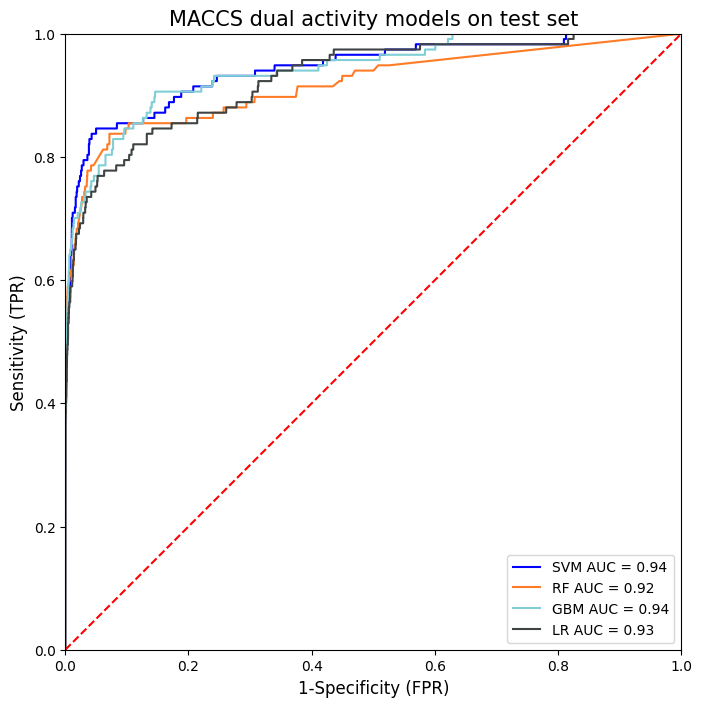

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.3441
0.3989
0.4542
0.4371


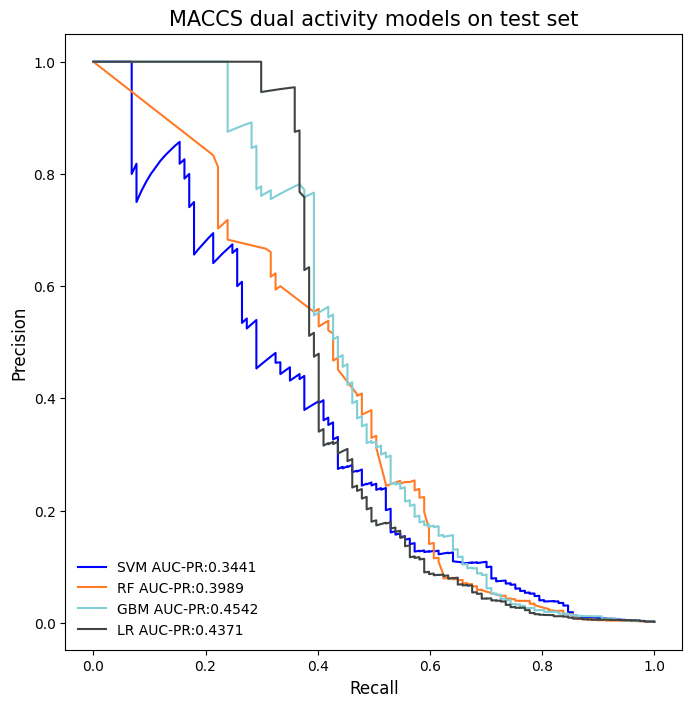

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS dual activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

#Asexuals MACCS models

In [ ]:
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())

compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

compounds


/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

[(<rdkit.Chem.rdchem.Mol at 0x7fdde9f42580>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42460>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f421c0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42040>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42280>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42640>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f425e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42760>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42700>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42220>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f422e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42880>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f428e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42940>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f429a0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42a00>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42a60>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42ac0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42b20>, '

In [ ]:
compounds
dpchm= pd.DataFrame (compounds, columns = ['mol', 'hit'])
dpchm
dpchm["Target"] = np.where(dpchm["hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()
dchm= dpchm["mol"]
dchm
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df = pd.DataFrame(maccs)

#5-fold CV ROC-AUC

<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
/usr/local

[0.16212625 0.0482931  0.04326865 0.03953337 0.03707853 0.03090593
 0.02690055 0.02389222 0.02389543 0.02389543 0.02389543 0.02389543
 0.02389543 0.02389543 0.02389543 0.02389543 0.02389543 0.02383009
 0.02369942 0.02369942 0.02363409 0.02363409 0.02356876 0.02350344
 0.02343811 0.02343811 0.02343811 0.02343811 0.02343811 0.02337279
 0.02337279 0.02337279 0.02337279 0.02324216 0.02324216 0.02324216
 0.02324216 0.02317684 0.02317684 0.02317684 0.02317684 0.02317684
 0.02317684 0.02317684 0.02317684 0.02317684 0.02247546 0.02208356
 0.02137179 0.02062367 0.02025021 0.01969931 0.01940096 0.01871892
 0.0179174  0.01715207 0.01692547 0.0164861  0.01596234 0.01542467
 0.01522798 0.01504227 0.01470669 0.0143537  0.01428808 0.01382873
 0.01348264 0.0129578  0.01265281 0.01241438 0.01203773 0.01165596
 0.01120864 0.010858   0.01052943 0.01000379 0.00969377 0.00919388
 0.00906245 0.00874716 0.0080242  0.00736714 0.00651328 0.00617536
 0.00597811 0.00569788 0.00543488 0.00484326 0.00425181 0.0035

<ipython-input-18-e79ba2f6d085>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-18-e79ba2f6d085>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter a

[0.11075894 0.06212535 0.05338993 0.0497629  0.04810394 0.0467622
 0.04518242 0.04267049 0.04121191 0.03978088 0.03803283 0.03674793
 0.03501176 0.0339539  0.03342328 0.03214917 0.03146663 0.03058172
 0.0300945  0.02974242 0.02896938 0.02813686 0.02735906 0.02643187
 0.02590441 0.02479004 0.02390137 0.02340378 0.02283952 0.02231318
 0.02170088 0.02116044 0.0206276  0.02005647 0.01949078 0.01913438
 0.01901277 0.01820039 0.01757359 0.01731944 0.01674617 0.01600293
 0.01589751 0.01534355 0.01489904 0.01455837 0.0144505  0.01375756
 0.01332742 0.01283282 0.01251165 0.01208779 0.01147309 0.01119636
 0.01087742 0.01035032 0.00988062 0.00962359 0.00949515 0.00906998
 0.00864582 0.00845395 0.00769102 0.00730961 0.00712007 0.00682232
 0.00658686 0.00647862 0.00641497 0.00603401 0.00560843 0.00565208
 0.00548348 0.00516689 0.00504924 0.00493911 0.00474524 0.00430118
 0.00430118 0.0042365  0.00386972 0.00310186 0.00265986 0.00228689
 0.00209514 0.00184214 0.00177325 0.00176467 0.00157328 0.00131

<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[1.14740695e-01 5.94348668e-02 5.80433677e-02 5.45071570e-02
 5.18646076e-02 5.07013947e-02 4.87508880e-02 4.65135466e-02
 4.47290422e-02 4.32418818e-02 4.23109483e-02 4.13676430e-02
 4.07519554e-02 3.97743799e-02 3.90147686e-02 3.75017098e-02
 3.61508991e-02 3.49188390e-02 3.42808515e-02 3.31663249e-02
 3.22689437e-02 3.16583696e-02 3.12338423e-02 3.07612214e-02
 3.00086360e-02 2.92187582e-02 2.85222746e-02 2.73307912e-02
 2.63882935e-02 2.59190696e-02 2.55569171e-02 2.52694434e-02
 2.46150367e-02 2.34879933e-02 2.28288441e-02 2.26399372e-02
 2.24407738e-02 2.15716647e-02 2.08936896e-02 2.05522432e-02
 1.99759083e-02 1.93843630e-02 1.88731048e-02 1.81316487e-02
 1.78311013e-02 1.73006818e-02 1.70837874e-02 1.66774487e-02
 1.62080702e-02 1.58905056e-02 1.54122468e-02 1.49005248e-02
 1.40919753e-02 1.40492789e-02 1.31129796e-02 1.25354711e-02
 1.23513387e-02 1.19167627e-02 1.16065198e-02 1.13476468e-02
 1.11385714e-02 1.06302333e-02 1.02517133e-02 9.92762422e-03
 9.61401210e-03 9.315543

<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))


[6.81366660e-02 6.80437163e-02 6.93571245e-02 6.43383223e-02
 6.15410117e-02 5.56420060e-02 5.44462084e-02 5.24923957e-02
 5.15617166e-02 5.10451964e-02 4.98924427e-02 4.88073692e-02
 4.66071514e-02 4.50005332e-02 4.35344931e-02 4.18600719e-02
 4.07405096e-02 3.85970290e-02 3.72570820e-02 3.58771544e-02
 3.51181801e-02 3.34615764e-02 3.32688265e-02 3.24772457e-02
 3.22843640e-02 3.17541901e-02 3.08945520e-02 2.99803304e-02
 2.93567748e-02 2.89897599e-02 2.78386223e-02 2.71904535e-02
 2.62736591e-02 2.54561546e-02 2.47689035e-02 2.34053959e-02
 2.25950786e-02 2.23484739e-02 2.21150147e-02 2.16159402e-02
 2.04647562e-02 1.98893162e-02 1.91871581e-02 1.83723096e-02
 1.76054847e-02 1.70824078e-02 1.66128788e-02 1.59421217e-02
 1.55284826e-02 1.51766546e-02 1.45484640e-02 1.40876767e-02
 1.33795402e-02 1.30254978e-02 1.21489414e-02 1.18044829e-02
 1.11264390e-02 1.09503640e-02 1.03287551e-02 9.93333165e-03
 9.45130954e-03 9.08958617e-03 8.32730523e-03 8.06587800e-03
 7.65103124e-03 7.412532

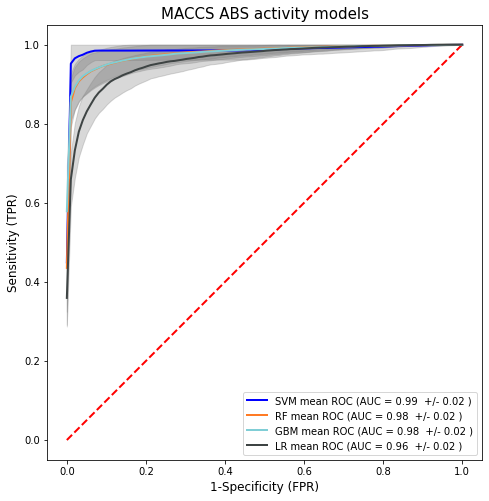

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('MACCS ABS activity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

#Load Asexual screening test set

In [ ]:
import pandas as pd
df1= pd.read_csv("asexualsUntrainedTest.csv")
df1

,Unnamed: 0,mol,Hit,Smiles
0,51742,<rdkit.Chem.rdchem.Mol object at 0x7f71149bf680>,No,O=C(NCCCN1CCOCC1)C1CCCN(Cc2ccco2)C1
1,20279,<rdkit.Chem.rdchem.Mol object at 0x7f7114ed6180>,No,Cc1nocc1C(=O)N1CCCC2(CCN(c3cnn(C)c3)C2=O)C1
2,17729,<rdkit.Chem.rdchem.Mol object at 0x7f71219e38b0>,No,Cn1cncc1-c1nnc([C@H]2CCN(Cc3cccnc3)C2)o1
3,28545,<rdkit.Chem.rdchem.Mol object at 0x7f7114dc26c0>,No,CCn1nc(C)c2nc(C(C)C)nc(NCC(C)C)c21
4,24371,<rdkit.Chem.rdchem.Mol object at 0x7f7114f4b140>,No,CN(C)CC1(O)CCCN(Cc2ccccc2OCC(=O)N(C)C)C1
...,...,...,...,...
61024,72080,<rdkit.Chem.rdchem.Mol object at 0x7f7114740cf0>,No,N#Cc1cccc(NC(=O)NC2CCN(CCCCCNC(=O)/C=C/c3ccc(C...
61025,49244,<rdkit.Chem.rdchem.Mol object at 0x7f7114b4a340>,No,NC1(C(=O)NCC2CCCN(Cc3cccc4nonc34)C2)CCC1
61026,47413,<rdkit.Chem.rdchem.Mol object at 0x7f7114afbae0>,No,CNC(=O)C1CCCN(c2nc(-c3ccco3)nc3c2CCNCC3)C1
61027,73164,<rdkit.Chem.rdchem.Mol object at 0x7f711476eb20>,No,CC(Cc1ccc(OC2CCCCC2)cc1)NCC(O)c1cccc(Cl)c1.Cl


In [ ]:
compounds = []


for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl=dff
axl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f7113906500>,No,O=C(NCCCN1CCOCC1)C1CCCN(Cc2ccco2)C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f7113906960>,No,Cc1nocc1C(=O)N1CCCC2(CCN(c3cnn(C)c3)C2=O)C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f7113907680>,No,Cn1cncc1-c1nnc([C@H]2CCN(Cc3cccnc3)C2)o1
3,<rdkit.Chem.rdchem.Mol object at 0x7f71139061f0>,No,CCn1nc(C)c2nc(C(C)C)nc(NCC(C)C)c21
4,<rdkit.Chem.rdchem.Mol object at 0x7f7113906c00>,No,CN(C)CC1(O)CCCN(Cc2ccccc2OCC(=O)N(C)C)C1
...,...,...,...
61024,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2ef80>,No,N#Cc1cccc(NC(=O)NC2CCN(CCCCCNC(=O)/C=C/c3ccc(C...
61025,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2eff0>,No,NC1(C(=O)NCC2CCCN(Cc3cccc4nonc34)C2)CCC1
61026,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2f060>,No,CNC(=O)C1CCCN(c2nc(-c3ccco3)nc3c2CCNCC3)C1
61027,<rdkit.Chem.rdchem.Mol object at 0x7f7112d2f0d0>,No,CC(Cc1ccc(OC2CCCCC2)cc1)NCC(O)c1cccc(Cl)c1.Cl


## MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dpchm= axl
#dchm
dpchm["Target"] = np.where(dpchm["Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]

df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61024,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
61025,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
61026,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
61027,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0


In [ ]:
Xt_test = df
Yt_test= axl["Target"]

## SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('asexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.835799
Recall 0.922166
precision 0.207758
F1 score: 0.339115
ROCAUC score: 0.8769157029132671
Accuracy score: 0.835799374068066
F1 score: 0.3391149508672426
Cohens kappa: 0.285864
ROC AUC: 0.876916
[[48437  9804]
 [  217  2571]]


array([[48437,  9804],
       [  217,  2571]])

In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 61029
0    58241
1     2788
Name: Target, dtype: int64
[[48437  9804]
 [  217  2571]]


##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('asexualsRF_HPTFinal_UMACCS_model.pkl')

In [ ]:
rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    49197
1    11832
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.839716
Recall 0.867647
precision 0.204446
F1 score: 0.330917
ROCAUC score: 0.8530127603659036
Accuracy score: 0.8397155450687378
F1 score: 0.33091655266757863
Cohens kappa: 0.277492
ROC AUC: 0.853013
[[48828  9413]
 [  369  2419]]


##LR

In [ ]:
import pandas
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('asexualsLR_HPTFInal_UMACCS_model.pkl')

In [ ]:

lrc_predict = lr_model.predict(Xt_test)
p= lrc_predict
p= pd.DataFrame(p)
print(p.value_counts())

0    31588
1    29441
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.560750
Recall 0.972382
precision 0.092082
F1 score: 0.168234


array([[31511, 26730],
       [   77,  2711]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.7567133019511737
Accuracy score: 0.5607498074685805
F1 score: 0.16823357845418724


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.092490
ROC AUC: 0.756713
[[31511 26730]
 [   77  2711]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 61029
0    58241
1     2788
Name: Target, dtype: int64
[[31511 26730]
 [   77  2711]]


##GBM

In [ ]:
import pandas
import joblib


In [ ]:

gbm_model = joblib.load('asexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
xgbc_predict = gbm_model.predict(Xt_test)
p= xgbc_predict
p= pd.DataFrame(p)
print(p.value_counts())


No     48897
Yes    12132
dtype: int64


In [ ]:
xgbc_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
Yt_test

49688    0
44298    0
52891    0
24374    0
20956    0
        ..
53567    0
68400    0
23311    0
27686    0
46948    0
Name: Target, Length: 61029, dtype: int64

In [ ]:
xgbc_predict= np.where(xgbc_predict== "Yes", 1,0)
#Yt_test= np.where(Yt_test== "Yes", 1,0)

In [ ]:
xgbc_predict
#Yt_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.837422
Recall 0.896341
precision 0.205984
F1 score: 0.334987


array([[48608,  9633],
       [  289,  2499]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))

ROCAUC score: 0.8654712588273871
Accuracy score: 0.8374215536875912
F1 score: 0.33498659517426277


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Cohens kappa: 0.281615
ROC AUC: 0.865471
[[48608  9633]
 [  289  2499]]


# Graph

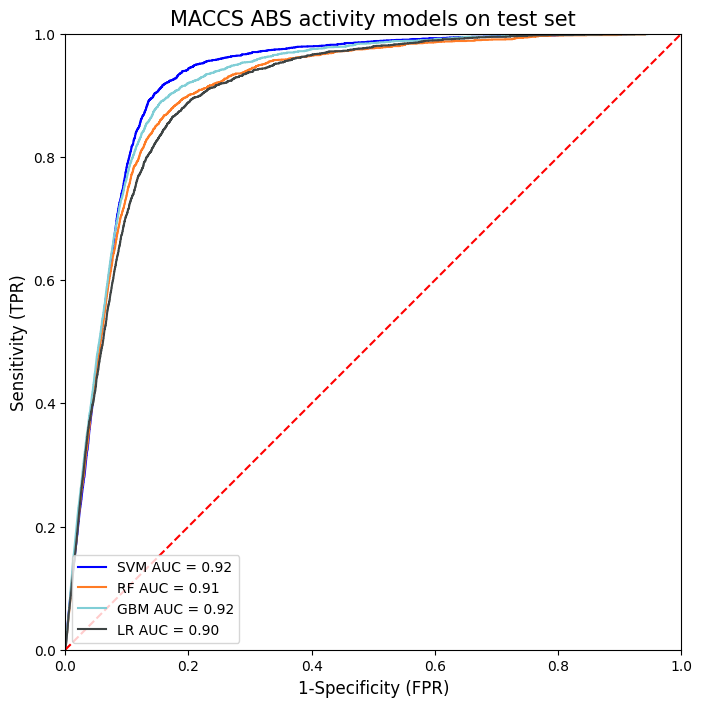

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.2851
0.2996
0.2888
0.2654


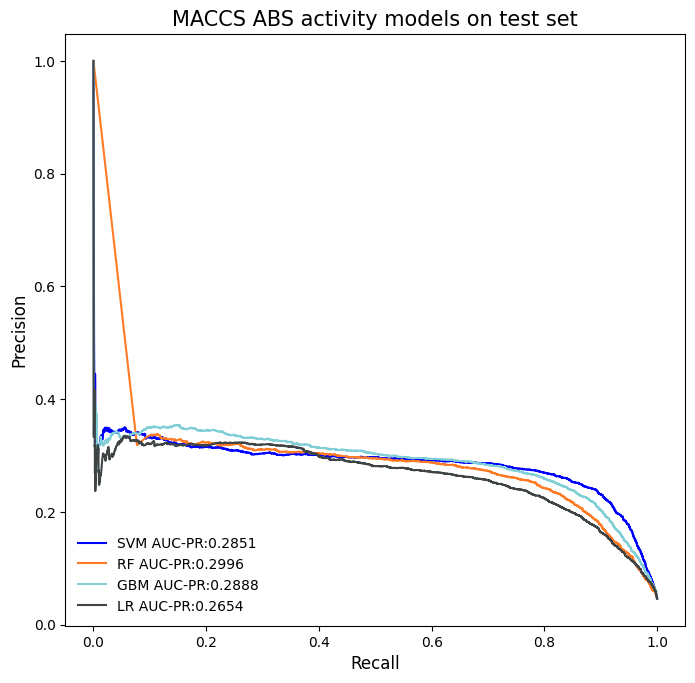

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS ABS activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# Unbalanced MACCS modeling

# Sexual models

In [ ]:
sxl= pd.read_csv("Merged_sexual_libraries_hits and nonhits_nd.csv")
print(sxl["S_Hit"].count())
nht= sxl[sxl["S_Hit"]== "No"]
nhts= nht[["Smiles", "S_Hit"]]
nhts = nhts.reset_index(drop=True)
nhts

/content
69011


,Smiles,S_Hit
0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,No
1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,No
2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,No
3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,No
4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,No
...,...,...
68796,CC(=O)Nc1nnc(SCc2c(C)cc(cc2C)C(C)(C)C)s1,No
68797,Cc1ccc(cc1)S(=O)(=O)c2c(COC(=O)c3cccc(C)c3)c(n...,No
68798,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...,No
68799,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...,No


In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/

import pandas as pd
sxl1= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl1['S_Hit'] = sxl1['S_Hit'].replace(np.nan, "No")
sxl1 = sxl1.iloc[: , 1:]
print(sxl1['S_Hit'].value_counts())
sxl1



/content/drive/MyDrive/PhD/PTS_datasets
No     8975
Yes     916
Name: S_Hit, dtype: int64


,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


In [ ]:
ht= sxl1[sxl1["S_Hit"]== "Yes"]
ht = ht.reset_index(drop=True)
ht

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
911,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...,Yes
912,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...,Yes
913,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...,Yes
914,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...,Yes


In [ ]:
sxl= nhts.append(ht)
sxl = sxl.reset_index(drop=True)
sxl

<ipython-input-9-9d4f6c643dad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sxl= nhts.append(ht)


,Smiles,S_Hit
0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,No
1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,No
2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,No
3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,No
4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,No
...,...,...
69712,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...,Yes
69713,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...,Yes
69714,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...,Yes
69715,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...,Yes


In [ ]:
df_smiles = sxl

In [ ]:
## Compound
compounds = []

df1 = df_smiles. iloc [:176]
for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df2 = df_smiles. iloc [177:637]
for _, compound_key, smiles in df2[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df3 = df_smiles. iloc [638:880]
for _, compound_key, smiles in df3[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df4 = df_smiles. iloc [881:2160]
for _, compound_key, smiles in df4[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df5 = df_smiles. iloc [2161:2662]
for _, compound_key, smiles in df5[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [2663:4273]
for _, compound_key, smiles in df6[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df7 = df_smiles. iloc [4274:8027]
for _, compound_key, smiles in df7[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [8028:8749]
for _, compound_key, smiles in df8[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8750:9132]
for _, compound_key, smiles in df9[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [9133:9993]
for _, compound_key, smiles in df10[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [9994:15541]
for _, compound_key, smiles in df11[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [15544:17608]
for _, compound_key, smiles in df12[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [17609:18039]
for _, compound_key, smiles in df13[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [18040:19840]
for _, compound_key, smiles in df14[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [19841:21008]
for _, compound_key, smiles in df15[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [21009:23464]
for _, compound_key, smiles in df16[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [23465:24399]
for _, compound_key, smiles in df17[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [24400:24499]
for _, compound_key, smiles in df18[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [24500:27475]
for _, compound_key, smiles in df19[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20 = df_smiles. iloc [27476:29517]
for _, compound_key, smiles in df20[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21 = df_smiles. iloc [29518:32330]
for _, compound_key, smiles in df21[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22 = df_smiles. iloc [32331:34028]
for _, compound_key, smiles in df22[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))
df23 = df_smiles. iloc [34029:36109]
for _, compound_key, smiles in df23[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24 = df_smiles. iloc [36110:39916]
for _, compound_key, smiles in df24[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25 = df_smiles. iloc [39917:40726]
for _, compound_key, smiles in df25[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df26 = df_smiles. iloc [40727:42620]
for _, compound_key, smiles in df26[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27 = df_smiles. iloc [42624:42974]
for _, compound_key, smiles in df27[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28 = df_smiles. iloc [42975:45122]
for _, compound_key, smiles in df28[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df29 = df_smiles. iloc [45123:45283]
for _, compound_key, smiles in df29[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30 = df_smiles. iloc [45284:46911]
for _, compound_key, smiles in df30[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31 = df_smiles. iloc [46912:49127]
for _, compound_key, smiles in df31[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32 = df_smiles. iloc [49128:50625]
for _, compound_key, smiles in df32[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33 = df_smiles. iloc [50626:51114]
for _, compound_key, smiles in df33[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34 = df_smiles. iloc [51115:53592]
for _, compound_key, smiles in df34[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35 = df_smiles. iloc [53593:54321]
for _, compound_key, smiles in df35[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36 = df_smiles. iloc [54322:54557]
for _, compound_key, smiles in df36[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37 = df_smiles. iloc [54558:55534]
for _, compound_key, smiles in df37[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38 = df_smiles. iloc [55536:55615]
for _, compound_key, smiles in df38[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39 = df_smiles. iloc [55617:59191]
for _, compound_key, smiles in df39[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40 = df_smiles. iloc [59192:61821]
for _, compound_key, smiles in df40[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41 = df_smiles. iloc [61822:62027]
for _, compound_key, smiles in df41[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42 = df_smiles. iloc [62028:63298]
for _, compound_key, smiles in df42[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43 = df_smiles. iloc [63299:63676]
for _, compound_key, smiles in df43[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44 = df_smiles. iloc [63677:68352]
for _, compound_key, smiles in df44[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45 = df_smiles. iloc [68353:]
for _, compound_key, smiles in df45[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f39ede37c30>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7f39ede37840>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f39ede377d0>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7f39ede376f0>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7f39ede37680>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
69661,<rdkit.Chem.rdchem.Mol object at 0x7f39ef267ed0>,Yes,COc1cc2nc(N3CCC(CCCC4CCNCC4)CC3)nc(NCc3ccccn3)...
69662,<rdkit.Chem.rdchem.Mol object at 0x7f39ef267f40>,Yes,Cc1ccc(Cl)c2sc(N3CCN(C(=O)c4ccc([N+](=O)[O-])o...
69663,<rdkit.Chem.rdchem.Mol object at 0x7f39ef27c040>,Yes,CCCCCCCN1CC[C@@H](CCCc2ccnc3ccc(OC)cc23)[C@@H]...
69664,<rdkit.Chem.rdchem.Mol object at 0x7f39ef27c0b0>,Yes,CN(C)CCNCc1cccc(-c2ccc3c(Nc4ccc(Oc5ccccn5)cc4)...


In [ ]:

# shuffle the DataFrame rows
sxl= sxl.sample(frac = 1)
sxl=sxl
sxl

,mol,S_Hit,Smiles
68094,<rdkit.Chem.rdchem.Mol object at 0x7f39ef2389e0>,No,Cc1nc[nH]c1-c1nnc(SCC(=O)O)n1-c1ccccc1C(F)(F)F
67737,<rdkit.Chem.rdchem.Mol object at 0x7f39ef226c00>,No,c1cnc(N2CC3(CCN(C4CCOCC4)CC3)c3ccccc32)nc1
23812,<rdkit.Chem.rdchem.Mol object at 0x7f39efa7d5b0>,No,COc1ccccc1OCC(=O)NS(=O)(=O)c1cccnc1
20542,<rdkit.Chem.rdchem.Mol object at 0x7f39efa2b6f0>,No,CCc1[nH]c2c(CNc3cncc(C(=O)OC)n3)cc(C)cc2c1C
12539,<rdkit.Chem.rdchem.Mol object at 0x7f39efabe650>,No,Cc1nc(CN2CCOC(Cn3cncn3)C2)nc2ccccc12
...,...,...,...
63652,<rdkit.Chem.rdchem.Mol object at 0x7f39ef3721f0>,No,COCC(NC(=O)c1cn(-c2cccc(Cl)c2F)nn1)C1CC1
28111,<rdkit.Chem.rdchem.Mol object at 0x7f39ef940200>,No,Cn1cc(CN2CCCN(C(=O)c3cc[nH]n3)CC2)cn1
64331,<rdkit.Chem.rdchem.Mol object at 0x7f39ef390dd0>,No,CCC(=O)N1CCC(c2nnc(Cn3cccn3)n2C2CC2)CC1
13964,<rdkit.Chem.rdchem.Mol object at 0x7f39efafd930>,No,CC(=O)NCC(=O)NCC1(O)CCN(c2cnccn2)C1


## MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dpchm= sxl
#dchm
dpchm["Target"] = np.where(dpchm["S_Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)

df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69661,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
69662,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
69663,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
69664,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

##SVC

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC( probability=True)

svc_model.fit(Xt_train, Yt_train)

svc_predict = svc_model.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.992464
Recall 0.449735
precision 0.988372
F1 score: 0.618182


array([[13744,     1],
       [  104,    85]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))

ROCAUC score: 0.7248313480034106
Accuracy score: 0.9924644753839529
F1 score: 0.6181818181818182


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Cohens kappa: 0.614915
ROC AUC: 0.724831
[[13744     1]
 [  104    85]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 13934
0    13745
1      189
Name: Target, dtype: int64
[[13744     1]
 [  104    85]]


##RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,rfc_predict)
cm

Accuracy: 0.994546
Recall 0.666667
precision 0.906475
F1 score: 0.768293
ROCAUC score: 0.8328604340972474
Accuracy score: 0.994545715516004
F1 score: 0.7682926829268293
Cohens kappa: 0.765598
ROC AUC: 0.832860
[[13732    13]
 [   63   126]]
Test Set: 13934
0    13745
1      189
Name: Target, dtype: int64
[[13732    13]
 [   63   126]]


array([[13732,    13],
       [   63,   126]])

##GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.992823
Recall 0.518519
precision 0.915888
F1 score: 0.662162
ROCAUC score: 0.7589318674804306
Accuracy score: 0.992823309889479
F1 score: 0.6621621621621622
Cohens kappa: 0.658816
ROC AUC: 0.758932
[[13736     9]
 [   91    98]]
Test Set: 13934
0    13745
1      189
Name: Target, dtype: int64
[[13736     9]
 [   91    98]]


array([[13736,     9],
       [   91,    98]])

##LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.983063
Recall 0.740741
precision 0.428135
F1 score: 0.542636
ROCAUC score: 0.8635678967435969
Accuracy score: 0.9830630113391704
F1 score: 0.5426356589147288
Cohens kappa: 0.534635
ROC AUC: 0.863568
[[13558   187]
 [   49   140]]
Test Set: 13934
0    13745
1      189
Name: Target, dtype: int64
[[13558   187]
 [   49   140]]


array([[13558,   187],
       [   49,   140]])

# Graphs

In [ ]:
lr_model= lrc
rf_model=rfc
gbm_model= xgbc

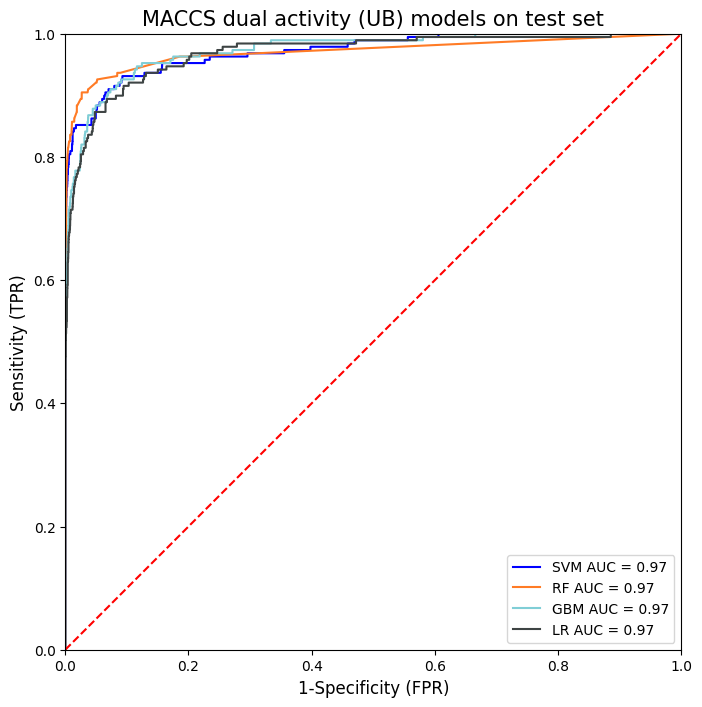

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity (UB) models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.8119
0.8356
0.735
0.7033


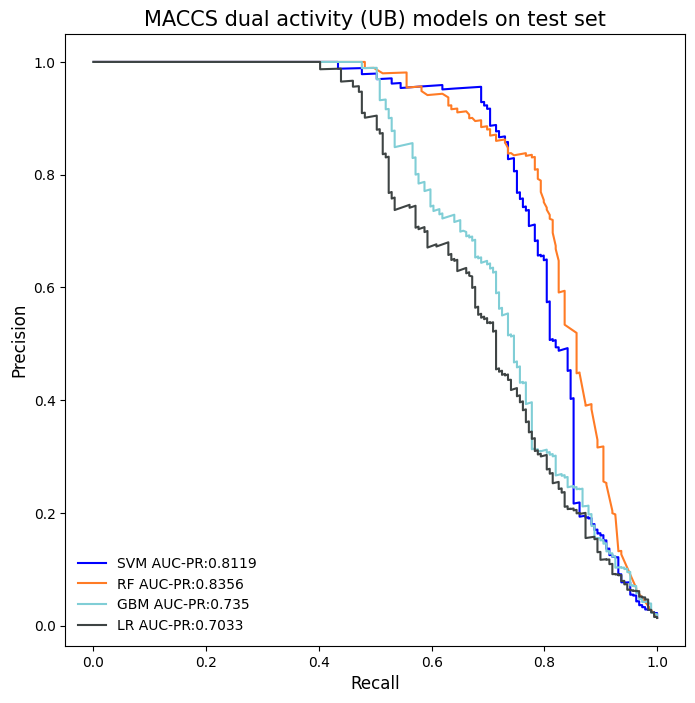

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS dual activity (UB) models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# Asexual models

In [ ]:
##Select those not in train set
sxl= pd.read_csv("Merged_asexual_libraries_hits and nonhits_nd.csv")
sxl

,Unnamed: 0,Smiles,CHEMBLID,Hit,Compound Key
0,0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,CHEMBL3470688,No,DDD01082494
1,1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,CHEMBL3447812,No,DDD01058126
2,2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,CHEMBL3486462,No,DDD01257825
3,3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,CHEMBL3467813,No,DDD01078886
4,4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,CHEMBL3452692,No,DDD01063562
...,...,...,...,...,...
122566,122566,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,CHEMBL99,Yes,GNF-Pf-1011
122567,122567,O=[N+]([O-])c1cc([N+](=O)[O-])c2cccnc2c1Nc1ccc...,CHEMBL603032,No,GNF-Pf-1014
122568,122568,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,CHEMBL585033,Yes,GNF-Pf-4623
122569,122569,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,CHEMBL583805,Yes,GNF-Pf-1023


In [ ]:
as_nhts= sxl[sxl["Hit"]== "No"]
print(len(as_nhts))

df_smiles = as_nhts[['Smiles',"Compound Key", "Hit"]]
print(len(df_smiles))
df_smiles

92178
92178


,Smiles,Compound Key,Hit
0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,DDD01082494,No
1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,DDD01058126,No
2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,DDD01257825,No
3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,DDD01078886,No
4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,DDD01063562,No
...,...,...,...
122557,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO,GNF-Pf-3449,No
122558,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1,GNF-Pf-3454,No
122559,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...,GNF-Pf-2736,No
122560,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...,GNF-Pf-2589,No


In [ ]:
## Compound
compounds = []
df1 = df_smiles. iloc [:1300]
df2 = df_smiles. iloc [1301:2600]
df3 = df_smiles. iloc [2601:3900]
df4 = df_smiles. iloc [3901:4300] #note error observed between compounds 4301-4310
df5 = df_smiles. iloc [4310:4600]

for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles  in df2[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df3[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df4[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df5[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df6 = df_smiles. iloc [4650:5600]
for _, compound_key, smiles in df6[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df7 = df_smiles. iloc [5700:6150]
for _, compound_key, smiles in df7[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key , smiles))

df8 = df_smiles. iloc [6180:7970]
for _, compound_key, smiles  in df8[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8000:10730]
for _, compound_key, smiles  in df9[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [10740:11410]
for _, compound_key, smiles in df10[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [11420:14010]
for _, compound_key, smiles in df11[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [14020:14580]
for _, compound_key, smiles in df12[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [14590:15794]
for _, compound_key, smiles  in df13[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [15795:18061]
for _, compound_key, smiles  in df14[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [18062:20531]
for _, compound_key, smiles  in df15[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [20532:20964]
for _, compound_key, smiles in df16[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [20966:22471]
for _, compound_key, smiles in df17[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [22473:25150]
for _, compound_key, smiles in df18[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [25153:25549]
for _, compound_key, smiles  in df19[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20= df_smiles. iloc [25551:28743]
for _, compound_key, smiles in df20[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21= df_smiles. iloc [28755:30045]
for _, compound_key, smiles  in df21[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22= df_smiles. iloc [30047:30857]
for _, compound_key, smiles  in df22[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df23= df_smiles. iloc [30859:31442]
for _, compound_key, smiles  in df23[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24= df_smiles. iloc [31444:31831]
for _, compound_key, smiles in df24[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25= df_smiles. iloc [31833:33515]
for _, compound_key, smiles  in df25[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df26= df_smiles. iloc [33517:33577]
for _, compound_key, smiles  in df26[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27= df_smiles. iloc [33579:35623]
for _, compound_key, smiles in df27[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28= df_smiles. iloc [35625:36239]
for _, compound_key, smiles  in df28[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df29= df_smiles. iloc [36240:38411]
for _, compound_key, smiles in df29[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30= df_smiles. iloc [38413:38536]
for _, compound_key, smiles in df30[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31= df_smiles. iloc [38538:39460]
for _, compound_key, smiles in df31[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32= df_smiles. iloc [39462:39880]
for _, compound_key, smiles in df32[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33= df_smiles. iloc [39882:44468]
for _, compound_key, smiles  in df33[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34= df_smiles. iloc [44479:45910]
for _, compound_key, smiles  in df34[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35= df_smiles. iloc [45912:50308]
for _, compound_key, smiles in df35[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36= df_smiles. iloc [50310:50644]
for _, compound_key, smiles in df36[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37= df_smiles. iloc [50646:50847]
for _, compound_key, smiles in df37[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38= df_smiles. iloc [50849:51016]
for _, compound_key, smiles  in df38[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39= df_smiles. iloc [51018:52255]
for _, compound_key, smiles  in df39[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40= df_smiles. iloc [52257:52515]
for _, compound_key, smiles  in df40[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41= df_smiles. iloc [52517:54570]
for _, compound_key, smiles in df41[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42= df_smiles. iloc [54572:56375]
for _, compound_key, smiles in df42[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43= df_smiles. iloc [56377:57950]
for _, compound_key, smiles  in df43[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44= df_smiles. iloc [57952:60363]
for _, compound_key, smiles  in df44[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45= df_smiles. iloc [60365:61892]
for _, compound_key, smiles in df45[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df46= df_smiles. iloc [61894:86486]
for _, compound_key, smiles in df46[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df47= df_smiles. iloc [86488:87067]
for _, compound_key, smiles in df47[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df48= df_smiles. iloc [87069:89383]
for _, compound_key, smiles  in df48[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df49= df_smiles. iloc [89385:90154]
for _, compound_key, smiles in df49[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df50= df_smiles. iloc [90156:90354]
for _, compound_key, smiles in df50[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df51= df_smiles. iloc [90356:90609]
for _, compound_key, smiles  in df51[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df52= df_smiles. iloc [90611:90746]
for _, compound_key, smiles in df52[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df53= df_smiles. iloc [90748:92006]
for _, compound_key, smiles  in df53[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df54= df_smiles. iloc [92008:]
for _, compound_key, smiles  in df54[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

len(compounds)

91817

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
sxl=dff
sxl

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f8008996650>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f80089969d0>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f80089963b0>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f8008996730>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f8008996420>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
91812,<rdkit.Chem.rdchem.Mol object at 0x7f80084053f0>,No,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO
91813,<rdkit.Chem.rdchem.Mol object at 0x7f8008405460>,No,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1
91814,<rdkit.Chem.rdchem.Mol object at 0x7f80084054d0>,No,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...
91815,<rdkit.Chem.rdchem.Mol object at 0x7f8008405540>,No,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...


In [ ]:

import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64


,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl2=dff
as_ht= axl2[axl2["Hit"]== "Yes"]

In [ ]:
as_ht

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f8006370510>,Yes,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f8006370740>,Yes,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...
2,<rdkit.Chem.rdchem.Mol object at 0x7f80063707b0>,Yes,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C
3,<rdkit.Chem.rdchem.Mol object at 0x7f8006370820>,Yes,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1
4,<rdkit.Chem.rdchem.Mol object at 0x7f8006370120>,Yes,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1
...,...,...,...
30382,<rdkit.Chem.rdchem.Mol object at 0x7f800820ab20>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
30383,<rdkit.Chem.rdchem.Mol object at 0x7f800820ab90>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
30384,<rdkit.Chem.rdchem.Mol object at 0x7f800820ac00>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
30385,<rdkit.Chem.rdchem.Mol object at 0x7f800820ac70>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:
axl= sxl.append(as_ht)
axl = axl.reset_index(drop=True)
axl

<ipython-input-14-71be01537f27>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  axl= sxl.append(as_ht)


,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f8008996650>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f80089969d0>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f80089963b0>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f8008996730>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f8008996420>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7f800820ab20>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
122200,<rdkit.Chem.rdchem.Mol object at 0x7f800820ab90>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
122201,<rdkit.Chem.rdchem.Mol object at 0x7f800820ac00>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
122202,<rdkit.Chem.rdchem.Mol object at 0x7f800820ac70>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:

# shuffle the DataFrame rows
axl= axl.sample(frac = 1)
axl=axl
axl

,mol,Hit,Smiles
1360,<rdkit.Chem.rdchem.Mol object at 0x7f8009e87e60>,No,CSCc1cccc(S(=O)(=O)NCCCN2CCOCC2)c1
82518,<rdkit.Chem.rdchem.Mol object at 0x7f8008674f20>,No,CN1CC=C(c2c[nH]c3ccc(OCc4ccccc4)cc23)CC1
72068,<rdkit.Chem.rdchem.Mol object at 0x7f8008cecac0>,No,CCCCc1ccc(C(=O)Nc2ccc3nc(N4CCN(CC)CC4)cc(C)c3c...
22707,<rdkit.Chem.rdchem.Mol object at 0x7f8009a45bd0>,No,Cc1cnc(CN(C)C2CCCN(Cc3noc(C4CC4)n3)C2)cn1
106723,<rdkit.Chem.rdchem.Mol object at 0x7f8008f5f7d0>,Yes,Cc1ccc2cc(C3NC(=O)c4ccccc4N3)c(Cl)nc2c1
...,...,...,...
91171,<rdkit.Chem.rdchem.Mol object at 0x7f80083eb760>,No,COc1ccc2[nH]c3ccccc3c(=O)c2c1
110243,<rdkit.Chem.rdchem.Mol object at 0x7f80086449e0>,Yes,CS(=O)(=O)Nc1ccc(OCCCCCCOc2ccc(NS(C)(=O)=O)cc2...
50706,<rdkit.Chem.rdchem.Mol object at 0x7f800913b060>,No,Cc1noc(C)c1C(=O)NCCN1CCN(c2ccccc2)CC1
51987,<rdkit.Chem.rdchem.Mol object at 0x7f80091767a0>,No,CCOCc1nc(CSc2ccncc2)n(C)n1


In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
dpchm= axl
#dchm
dpchm["Target"] = np.where(dpchm["Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
122200,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
122201,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
122202,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

##SVC

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC( probability=True)

svc_model.fit(Xt_train, Yt_train)



SVC(probability=True)

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.782865
Recall 0.356227
precision 0.609502
F1 score: 0.449653


array([[16966,  1389],
       [ 3918,  2168]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))

ROCAUC score: 0.6402766019748
Accuracy score: 0.7828648582300233
F1 score: 0.4496525977392928


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Cohens kappa: 0.325801
ROC AUC: 0.640277
[[16966  1389]
 [ 3918  2168]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 24441
0    18355
1     6086
Name: Target, dtype: int64
[[16966  1389]
 [ 3918  2168]]


##RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

# predict
rfc_predict = rfc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,rfc_predict)
cm

Accuracy: 0.754429
Recall 0.465871
precision 0.503041
F1 score: 0.483743
ROCAUC score: 0.6574670963623314
Accuracy score: 0.7544290331819483
F1 score: 0.4837433339067607
Cohens kappa: 0.322953
ROC AUC: 0.657467
[[15627  2778]
 [ 3224  2812]]
Test Set: 24441
0    18405
1     6036
Name: Target, dtype: int64
[[15627  2778]
 [ 3224  2812]]


array([[15627,  2778],
       [ 3224,  2812]])

##GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,xgbc_predict)
cm

Accuracy: 0.768095
Recall 0.330351
precision 0.550829
F1 score: 0.413007
ROCAUC score: 0.62100283385263
Accuracy score: 0.768094595147498
F1 score: 0.4130074565037282
Cohens kappa: 0.279613
ROC AUC: 0.621003
[[16779  1626]
 [ 4042  1994]]
Test Set: 24441
0    18405
1     6036
Name: Target, dtype: int64
[[16779  1626]
 [ 4042  1994]]


array([[16779,  1626],
       [ 4042,  1994]])

##LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.635080
Recall 0.952286
precision 0.399750
F1 score: 0.563115
ROCAUC score: 0.7416688135247196
Accuracy score: 0.6350803976924021
F1 score: 0.5631153563556208
Cohens kappa: 0.330047
ROC AUC: 0.741669
[[9774 8631]
 [ 288 5748]]
Test Set: 24441
0    18405
1     6036
Name: Target, dtype: int64
[[9774 8631]
 [ 288 5748]]


array([[9774, 8631],
       [ 288, 5748]])

#Graphs

In [ ]:

lr_model = lrc
rf_model = rfc
gbm_model = xgbc

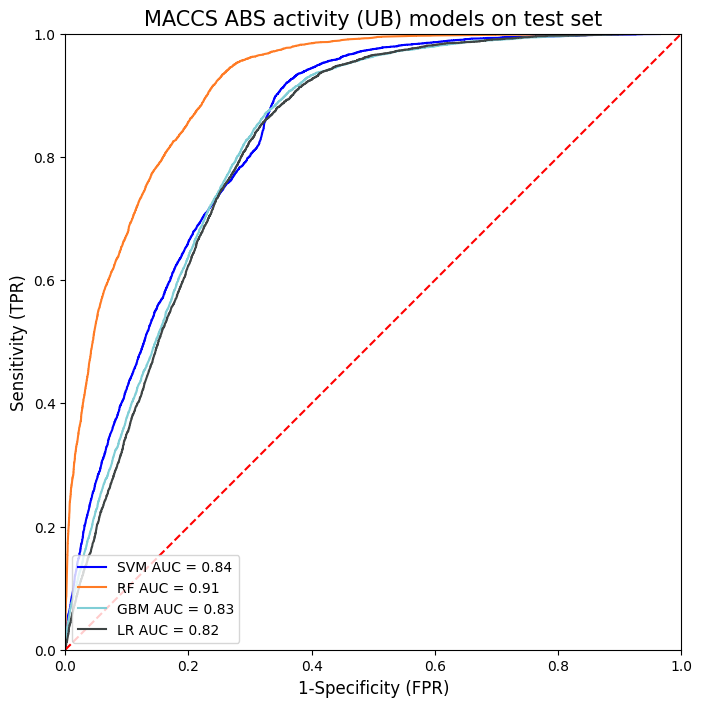

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity (UB) models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.5782
0.7693
0.5482
0.5197


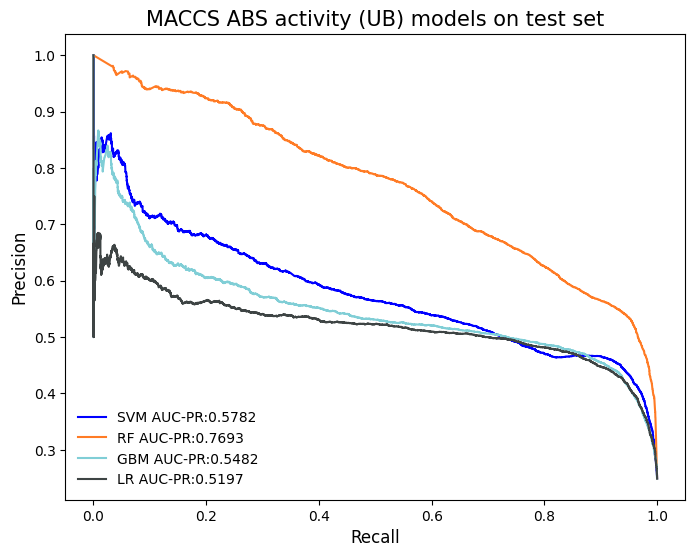

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS ABS activity (UB) models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# Oversampling Model comparision


#Dual MFP

In [ ]:

sxl= pd.read_csv("Merged_sexual_libraries_hits and nonhits_nd.csv")

/content


In [ ]:
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f22562722d0>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7f2256272490>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f2256272500>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7f2256272570>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7f22562725e0>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
68955,<rdkit.Chem.rdchem.Mol object at 0x7f225543b1b0>,No,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...
68956,<rdkit.Chem.rdchem.Mol object at 0x7f225543b220>,No,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...
68957,<rdkit.Chem.rdchem.Mol object at 0x7f225543b290>,Yes,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1
68958,<rdkit.Chem.rdchem.Mol object at 0x7f225543b300>,No,N1(C=CC(N)=NC1=O)C2O[C@@H]([C@@H](O)[C@H]2O)CO


In [ ]:
df_smiles = sxl

In [ ]:
## Compound
compounds = []

df1 = df_smiles. iloc [:176]
for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df2 = df_smiles. iloc [177:637]
for _, compound_key, smiles in df2[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df3 = df_smiles. iloc [638:880]
for _, compound_key, smiles in df3[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df4 = df_smiles. iloc [881:2160]
for _, compound_key, smiles in df4[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df5 = df_smiles. iloc [2161:2662]
for _, compound_key, smiles in df5[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [2663:4273]
for _, compound_key, smiles in df6[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df7 = df_smiles. iloc [4274:8027]
for _, compound_key, smiles in df7[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [8028:8749]
for _, compound_key, smiles in df8[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8750:9132]
for _, compound_key, smiles in df9[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [9133:9993]
for _, compound_key, smiles in df10[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [9994:15541]
for _, compound_key, smiles in df11[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [15544:17608]
for _, compound_key, smiles in df12[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [17609:18039]
for _, compound_key, smiles in df13[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [18040:19840]
for _, compound_key, smiles in df14[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [19841:21008]
for _, compound_key, smiles in df15[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [21009:23464]
for _, compound_key, smiles in df16[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [23465:24399]
for _, compound_key, smiles in df17[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [24400:24499]
for _, compound_key, smiles in df18[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [24500:27475]
for _, compound_key, smiles in df19[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20 = df_smiles. iloc [27476:29517]
for _, compound_key, smiles in df20[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21 = df_smiles. iloc [29518:32330]
for _, compound_key, smiles in df21[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22 = df_smiles. iloc [32331:34028]
for _, compound_key, smiles in df22[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))
df23 = df_smiles. iloc [34029:36109]
for _, compound_key, smiles in df23[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24 = df_smiles. iloc [36110:39916]
for _, compound_key, smiles in df24[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25 = df_smiles. iloc [39917:40726]
for _, compound_key, smiles in df25[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df26 = df_smiles. iloc [40727:42620]
for _, compound_key, smiles in df26[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27 = df_smiles. iloc [42624:42974]
for _, compound_key, smiles in df27[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28 = df_smiles. iloc [42975:45122]
for _, compound_key, smiles in df28[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df29 = df_smiles. iloc [45123:45283]
for _, compound_key, smiles in df29[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30 = df_smiles. iloc [45284:46911]
for _, compound_key, smiles in df30[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31 = df_smiles. iloc [46912:49127]
for _, compound_key, smiles in df31[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32 = df_smiles. iloc [49128:50625]
for _, compound_key, smiles in df32[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33 = df_smiles. iloc [50626:51114]
for _, compound_key, smiles in df33[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34 = df_smiles. iloc [51115:53592]
for _, compound_key, smiles in df34[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35 = df_smiles. iloc [53593:54321]
for _, compound_key, smiles in df35[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36 = df_smiles. iloc [54322:54557]
for _, compound_key, smiles in df36[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37 = df_smiles. iloc [54558:55534]
for _, compound_key, smiles in df37[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38 = df_smiles. iloc [55536:55615]
for _, compound_key, smiles in df38[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39 = df_smiles. iloc [55617:59191]
for _, compound_key, smiles in df39[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40 = df_smiles. iloc [59192:61821]
for _, compound_key, smiles in df40[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41 = df_smiles. iloc [61822:62027]
for _, compound_key, smiles in df41[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42 = df_smiles. iloc [62028:63298]
for _, compound_key, smiles in df42[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43 = df_smiles. iloc [63299:63676]
for _, compound_key, smiles in df43[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44 = df_smiles. iloc [63677:68352]
for _, compound_key, smiles in df44[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45 = df_smiles. iloc [68353:]
for _, compound_key, smiles in df45[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f22562722d0>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7f2256272490>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f2256272500>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7f2256272570>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7f22562725e0>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
68955,<rdkit.Chem.rdchem.Mol object at 0x7f225543b1b0>,No,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...
68956,<rdkit.Chem.rdchem.Mol object at 0x7f225543b220>,No,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...
68957,<rdkit.Chem.rdchem.Mol object at 0x7f225543b290>,Yes,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1
68958,<rdkit.Chem.rdchem.Mol object at 0x7f225543b300>,No,N1(C=CC(N)=NC1=O)C2O[C@@H]([C@@H](O)[C@H]2O)CO


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["mol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

,mol,S_Hit,Smiles,Input,Target
0,<rdkit.Chem.rdchem.Mol object at 0x7f22562722d0>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",0
1,<rdkit.Chem.rdchem.Mol object at 0x7f2256272490>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0
2,<rdkit.Chem.rdchem.Mol object at 0x7f2256272500>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,<rdkit.Chem.rdchem.Mol object at 0x7f2256272570>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,<rdkit.Chem.rdchem.Mol object at 0x7f22562725e0>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...
68955,<rdkit.Chem.rdchem.Mol object at 0x7f225543b1b0>,No,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0
68956,<rdkit.Chem.rdchem.Mol object at 0x7f225543b220>,No,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0
68957,<rdkit.Chem.rdchem.Mol object at 0x7f225543b290>,Yes,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
68958,<rdkit.Chem.rdchem.Mol object at 0x7f225543b300>,No,N1(C=CC(N)=NC1=O)C2O[C@@H]([C@@H](O)[C@H]2O)CO,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [ ]:
mfp= []
mfp = sxl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


0        [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
68955    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
68956    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
68957    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
68958    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
68959    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: mol, Length: 68960, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
!pip install imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(Xt_train, Yt_train)


In [ ]:
Yt_train = y_train_oversampled
Yt_train

0         0
1         0
2         0
3         0
4         0
         ..
110009    1
110010    1
110011    1
110012    1
110013    1
Name: Target, Length: 110014, dtype: int64

In [ ]:
X_train_oversampled

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.0,0.000000,1.00000,0.0,0.000000,0.000000,0.0,0.0,...,1.0,1.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,1.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,1.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,1.000000,0.00000,0.0,1.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
4,0.000000,0.000000,1.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,1.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110009,0.942634,0.000000,0.0,0.057366,0.00000,1.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.942634,0.000000,0.0,0.000000
110010,0.000000,0.308476,0.0,0.000000,0.00000,0.0,0.308476,0.691524,0.0,0.0,...,1.0,0.00000,0.0,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.308476
110011,0.000000,0.000000,0.0,0.000000,0.78542,0.0,0.000000,0.785420,0.0,0.0,...,0.0,0.78542,0.0,0.000000,0.000000,0.0,0.214580,0.214580,0.0,0.000000
110012,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.971906,0.000000,0.0,0.028094,0.028094,0.0,0.000000


In [ ]:
Xt_train= X_train_oversampled.round(decimals = 1)
Xt_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110009,0.9,0.0,0.0,0.1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0
110010,0.0,0.3,0.0,0.0,0.0,0.0,0.3,0.7,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.3
110011,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.0,...,0.0,0.8,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0
110012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model building

### SVM

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(probability=True)

svc_model.fit(Xt_train, Yt_train)


SVC(probability=True)

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.997100
Recall 0.204082
precision 0.909091
F1 score: 0.333333
ROCAUC score: 0.6020044341683409
Accuracy score: 0.9970997679814385
F1 score: 0.33333333333333337
Cohens kappa: 0.332464
ROC AUC: 0.602004
[[13742     1]
 [   39    10]]


array([[13742,     1],
       [   39,    10]])

### RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

RandomForestClassifier()

In [ ]:
# predict
rfc_predict = rfc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rfc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)

Accuracy: 0.996592
Recall 0.061224
precision 0.750000
F1 score: 0.113208
ROCAUC score: 0.5305758627397696
Accuracy score: 0.9965922273781903
F1 score: 0.11320754716981131
Cohens kappa: 0.112732
ROC AUC: 0.530576
[[13742     1]
 [   46     3]]


### GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

GradientBoostingClassifier()

In [ ]:
# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Accuracy: 0.993619
Recall 0.469388
precision 0.270588
F1 score: 0.343284
ROCAUC score: 0.7324381837432637
Accuracy score: 0.9936194895591647
F1 score: 0.3432835820895522
Cohens kappa: 0.340310
ROC AUC: 0.732438
[[13681    62]
 [   26    23]]


### LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=300)

In [ ]:
# predict
lrc_predict = lrc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Accuracy: 0.987747
Recall 0.408163
precision 0.125000
F1 score: 0.191388
ROCAUC score: 0.6989881305065139
Accuracy score: 0.9877465197215777
F1 score: 0.19138755980861244
Cohens kappa: 0.186965
ROC AUC: 0.698988
[[13603   140]
 [   29    20]]


#ABS MFP

In [ ]:
##Select those not in train set
sxl= pd.read_csv("Merged_asexual_libraries_hits and nonhits_nd.csv")
sxl

,Unnamed: 0,Smiles,CHEMBLID,Hit,Compound Key
0,0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,CHEMBL3470688,No,DDD01082494
1,1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,CHEMBL3447812,No,DDD01058126
2,2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,CHEMBL3486462,No,DDD01257825
3,3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,CHEMBL3467813,No,DDD01078886
4,4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,CHEMBL3452692,No,DDD01063562
...,...,...,...,...,...
122566,122566,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,CHEMBL99,Yes,GNF-Pf-1011
122567,122567,O=[N+]([O-])c1cc([N+](=O)[O-])c2cccnc2c1Nc1ccc...,CHEMBL603032,No,GNF-Pf-1014
122568,122568,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,CHEMBL585033,Yes,GNF-Pf-4623
122569,122569,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,CHEMBL583805,Yes,GNF-Pf-1023


In [ ]:
as_nhts= sxl[sxl["Hit"]== "No"]
print(len(as_nhts))

df_smiles = as_nhts[['Smiles',"Compound Key", "Hit"]]
print(len(df_smiles))
df_smiles

92178
92178


,Smiles,Compound Key,Hit
0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,DDD01082494,No
1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,DDD01058126,No
2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,DDD01257825,No
3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,DDD01078886,No
4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,DDD01063562,No
...,...,...,...
122557,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO,GNF-Pf-3449,No
122558,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1,GNF-Pf-3454,No
122559,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...,GNF-Pf-2736,No
122560,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...,GNF-Pf-2589,No


In [ ]:
## Compound
compounds = []
df1 = df_smiles. iloc [:1300]
df2 = df_smiles. iloc [1301:2600]
df3 = df_smiles. iloc [2601:3900]
df4 = df_smiles. iloc [3901:4300] #note error observed between compounds 4301-4310
df5 = df_smiles. iloc [4310:4600]

for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles  in df2[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df3[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df4[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df5[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [4650:5600]
for _, compound_key, smiles in df6[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles ))

df7 = df_smiles. iloc [5700:6150]
for _, compound_key, smiles in df7[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [6180:7970]
for _, compound_key, smiles  in df8[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8000:10730]
for _, compound_key, smiles  in df9[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [10740:11410]
for _, compound_key, smiles in df10[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [11420:14010]
for _, compound_key, smiles in df11[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [14020:14580]
for _, compound_key, smiles in df12[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [14590:15794]
for _, compound_key, smiles  in df13[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [15795:18061]
for _, compound_key, smiles  in df14[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [18062:20531]
for _, compound_key, smiles  in df15[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [20532:20964]
for _, compound_key, smiles in df16[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [20966:22471]
for _, compound_key, smiles in df17[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [22473:25150]
for _, compound_key, smiles in df18[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [25153:25549]
for _, compound_key, smiles  in df19[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20= df_smiles. iloc [25551:28743]
for _, compound_key, smiles in df20[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21= df_smiles. iloc [28755:30045]
for _, compound_key, smiles  in df21[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22= df_smiles. iloc [30047:30857]
for _, compound_key, smiles  in df22[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df23= df_smiles. iloc [30859:31442]
for _, compound_key, smiles  in df23[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24= df_smiles. iloc [31444:31831]
for _, compound_key, smiles in df24[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25= df_smiles. iloc [31833:33515]
for _, compound_key, smiles  in df25[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df26= df_smiles. iloc [33517:33577]
for _, compound_key, smiles  in df26[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27= df_smiles. iloc [33579:35623]
for _, compound_key, smiles in df27[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28= df_smiles. iloc [35625:36239]
for _, compound_key, smiles  in df28[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df29= df_smiles. iloc [36240:38411]
for _, compound_key, smiles in df29[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30= df_smiles. iloc [38413:38536]
for _, compound_key, smiles in df30[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31= df_smiles. iloc [38538:39460]
for _, compound_key, smiles in df31[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32= df_smiles. iloc [39462:39880]
for _, compound_key, smiles in df32[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33= df_smiles. iloc [39882:44468]
for _, compound_key, smiles  in df33[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34= df_smiles. iloc [44479:45910]
for _, compound_key, smiles  in df34[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35= df_smiles. iloc [45912:50308]
for _, compound_key, smiles in df35[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36= df_smiles. iloc [50310:50644]
for _, compound_key, smiles in df36[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37= df_smiles. iloc [50646:50847]
for _, compound_key, smiles in df37[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38= df_smiles. iloc [50849:51016]
for _, compound_key, smiles  in df38[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39= df_smiles. iloc [51018:52255]
for _, compound_key, smiles  in df39[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40= df_smiles. iloc [52257:52515]
for _, compound_key, smiles  in df40[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41= df_smiles. iloc [52517:54570]
for _, compound_key, smiles in df41[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42= df_smiles. iloc [54572:56375]
for _, compound_key, smiles in df42[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43= df_smiles. iloc [56377:57950]
for _, compound_key, smiles  in df43[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44= df_smiles. iloc [57952:60363]
for _, compound_key, smiles  in df44[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45= df_smiles. iloc [60365:61892]
for _, compound_key, smiles in df45[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df46= df_smiles. iloc [61894:86486]
for _, compound_key, smiles in df46[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df47= df_smiles. iloc [86488:87067]
for _, compound_key, smiles in df47[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df48= df_smiles. iloc [87069:89383]
for _, compound_key, smiles  in df48[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df49= df_smiles. iloc [89385:90154]
for _, compound_key, smiles in df49[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df50= df_smiles. iloc [90156:90354]
for _, compound_key, smiles in df50[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df51= df_smiles. iloc [90356:90609]
for _, compound_key, smiles  in df51[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df52= df_smiles. iloc [90611:90746]
for _, compound_key, smiles in df52[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df53= df_smiles. iloc [90748:92006]
for _, compound_key, smiles  in df53[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df54= df_smiles. iloc [92008:]
for _, compound_key, smiles  in df54[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

len(compounds)

91817

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
sxl=dff
sxl

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bed0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41b840>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bd80>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bae0>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bca0>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
91812,<rdkit.Chem.rdchem.Mol object at 0x7f2b39e52ab0>,No,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO
91813,<rdkit.Chem.rdchem.Mol object at 0x7f2b39e52b20>,No,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1
91814,<rdkit.Chem.rdchem.Mol object at 0x7f2b39e52b90>,No,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...
91815,<rdkit.Chem.rdchem.Mol object at 0x7f2b39e52c00>,No,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...


In [ ]:
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64


,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl2=dff
as_ht= axl2[axl2["Hit"]== "Yes"]

In [ ]:
axl= sxl.append(as_ht)
axl = axl.reset_index(drop=True)
axl

<ipython-input-13-71be01537f27>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  axl= sxl.append(as_ht)


,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bed0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41b840>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bd80>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bae0>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bca0>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00890>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
122200,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00900>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
122201,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00970>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
122202,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c009e0>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
axl

,mol,Hit,Smiles,Input,Target
0,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bed0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41b840>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bd80>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bae0>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",0
4,<rdkit.Chem.rdchem.Mol object at 0x7f2b3a41bca0>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00890>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
122200,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00900>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
122201,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c00970>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",1
122202,<rdkit.Chem.rdchem.Mol object at 0x7f2b37c009e0>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [ ]:
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1         [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3         [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...
4         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                ...                        
122199    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
122200    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
122201    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
122202    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
122203    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: mol, Length: 122204, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
122201,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
122202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
122201,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
122202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df,axl["Target"],test_size=0.2, random_state=42)

In [ ]:
!pip install imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(Xt_train, Yt_train)


In [ ]:
Yt_train = y_train_oversampled
Yt_train

0         0
1         0
2         0
3         0
4         0
         ..
146613    1
146614    1
146615    1
146616    1
146617    1
Name: Target, Length: 146618, dtype: int64

In [ ]:
X_train_oversampled

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
2,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
4,0.000000,0.0,0.0,1.000000,1.0,0.0,0.0,1.000000,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146613,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.961231,0.961231,0.038769,0.961231,0.000000,0.038769,0.0,0.000000,0.000000
146614,0.000000,0.0,0.0,0.973894,0.0,0.0,0.0,0.026106,0.0,0.0,...,0.026106,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
146615,0.414339,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
146616,0.000000,0.0,0.0,0.550007,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.449993,1.000000,0.000000,0.000000,0.000000,0.550007,0.000000,0.0,0.550007,0.449993


In [ ]:
Xt_train= X_train_oversampled.round(decimals = 1)
Xt_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
146614,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146615,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146616,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.0,0.0,0.0,0.0,0.6,0.0,0.0,0.6,0.4


## Model building

### SVM

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
#svc_model = SVC(probability=True)
svc_model = SVC()
svc_model.fit(Xt_train, Yt_train)


SVC()

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.745100
Recall 0.591101
precision 0.479688
F1 score: 0.529598
ROCAUC score: 0.6927839405163727
Accuracy score: 0.7451004459719324
F1 score: 0.5295983086680761
Cohens kappa: 0.357370
ROC AUC: 0.692784
[[14704  3804]
 [ 2426  3507]]


array([[14704,  3804],
       [ 2426,  3507]])

### RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

RandomForestClassifier()

In [ ]:
# predict
rfc_predict = rfc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rfc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)

Accuracy: 0.734626
Recall 0.492837
precision 0.456804
F1 score: 0.474137
ROCAUC score: 0.6524859845320509
Accuracy score: 0.7346262427887565
F1 score: 0.4741365331603697
Cohens kappa: 0.297013
ROC AUC: 0.652486
[[15031  3477]
 [ 3009  2924]]


### GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

GradientBoostingClassifier()

In [ ]:
# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Accuracy: 0.761139
Recall 0.592112
precision 0.506853
F1 score: 0.546175
ROCAUC score: 0.7037175099612994
Accuracy score: 0.7611390695961704
F1 score: 0.5461753731343284
Cohens kappa: 0.385411
ROC AUC: 0.703718
[[15090  3418]
 [ 2420  3513]]


### LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=300)

In [ ]:
# predict
lrc_predict = lrc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Accuracy: 0.493065
Recall 0.987527
precision 0.322366
F1 score: 0.486063
ROCAUC score: 0.6610427090698084
Accuracy score: 0.4930649318767645
F1 score: 0.48606271777003485
Cohens kappa: 0.189354
ROC AUC: 0.661043
[[ 6192 12316]
 [   74  5859]]


#Dual MACCS

In [ ]:
!time pip install rdkit


real	0m10.804s
user	0m7.570s
sys	0m0.360s


In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
%cd /content/
sxl= pd.read_csv("Merged_sexual_libraries_hits and nonhits_nd.csv")

/content


In [ ]:
sxl

,Unnamed: 0,Smiles,CHEMBLID,Compound Key,S_Hit
0,0,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1,CHEMBL3490801,DDD01298554,No
1,1,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1,CHEMBL3437403,DDD01025419,No
2,2,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl,CHEMBL3484454,DDD01255808,No
3,3,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2,CHEMBL3460097,DDD01071067,No
4,4,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1,CHEMBL3489873,DDD01297619,No
...,...,...,...,...,...
69006,69006,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...,CHEMBL598881,MMV007208,No
69007,69007,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...,CHEMBL587989,MMV666688,No
69008,69008,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1,CHEMBL534283,MMV665864,Yes
69009,69009,N1(C=CC(N)=NC1=O)C2O[C@@H]([C@@H](O)[C@H]2O)CO,CHEMBL2028065,MMV638723,No


In [ ]:
df_smiles = sxl

In [ ]:
## Compound
compounds = []

df1 = df_smiles. iloc [:176]
for _, compound_key, smiles in df1[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df2 = df_smiles. iloc [177:637]
for _, compound_key, smiles in df2[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df3 = df_smiles. iloc [638:880]
for _, compound_key, smiles in df3[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df4 = df_smiles. iloc [881:2160]
for _, compound_key, smiles in df4[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df5 = df_smiles. iloc [2161:2662]
for _, compound_key, smiles in df5[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [2663:4273]
for _, compound_key, smiles in df6[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df7 = df_smiles. iloc [4274:8027]
for _, compound_key, smiles in df7[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [8028:8749]
for _, compound_key, smiles in df8[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8750:9132]
for _, compound_key, smiles in df9[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [9133:9993]
for _, compound_key, smiles in df10[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [9994:15541]
for _, compound_key, smiles in df11[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [15544:17608]
for _, compound_key, smiles in df12[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [17609:18039]
for _, compound_key, smiles in df13[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [18040:19840]
for _, compound_key, smiles in df14[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [19841:21008]
for _, compound_key, smiles in df15[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [21009:23464]
for _, compound_key, smiles in df16[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [23465:24399]
for _, compound_key, smiles in df17[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [24400:24499]
for _, compound_key, smiles in df18[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [24500:27475]
for _, compound_key, smiles in df19[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20 = df_smiles. iloc [27476:29517]
for _, compound_key, smiles in df20[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21 = df_smiles. iloc [29518:32330]
for _, compound_key, smiles in df21[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22 = df_smiles. iloc [32331:34028]
for _, compound_key, smiles in df22[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))
df23 = df_smiles. iloc [34029:36109]
for _, compound_key, smiles in df23[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24 = df_smiles. iloc [36110:39916]
for _, compound_key, smiles in df24[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25 = df_smiles. iloc [39917:40726]
for _, compound_key, smiles in df25[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df26 = df_smiles. iloc [40727:42620]
for _, compound_key, smiles in df26[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27 = df_smiles. iloc [42624:42974]
for _, compound_key, smiles in df27[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28 = df_smiles. iloc [42975:45122]
for _, compound_key, smiles in df28[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


df29 = df_smiles. iloc [45123:45283]
for _, compound_key, smiles in df29[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30 = df_smiles. iloc [45284:46911]
for _, compound_key, smiles in df30[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31 = df_smiles. iloc [46912:49127]
for _, compound_key, smiles in df31[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32 = df_smiles. iloc [49128:50625]
for _, compound_key, smiles in df32[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33 = df_smiles. iloc [50626:51114]
for _, compound_key, smiles in df33[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34 = df_smiles. iloc [51115:53592]
for _, compound_key, smiles in df34[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35 = df_smiles. iloc [53593:54321]
for _, compound_key, smiles in df35[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36 = df_smiles. iloc [54322:54557]
for _, compound_key, smiles in df36[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37 = df_smiles. iloc [54558:55534]
for _, compound_key, smiles in df37[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38 = df_smiles. iloc [55536:55615]
for _, compound_key, smiles in df38[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39 = df_smiles. iloc [55617:59191]
for _, compound_key, smiles in df39[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40 = df_smiles. iloc [59192:61821]
for _, compound_key, smiles in df40[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41 = df_smiles. iloc [61822:62027]
for _, compound_key, smiles in df41[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42 = df_smiles. iloc [62028:63298]
for _, compound_key, smiles in df42[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43 = df_smiles. iloc [63299:63676]
for _, compound_key, smiles in df43[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44 = df_smiles. iloc [63677:68352]
for _, compound_key, smiles in df44[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45 = df_smiles. iloc [68353:]
for _, compound_key, smiles in df45[["S_Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))


In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'S_Hit', "Smiles"])
sxl=dff
sxl

,mol,S_Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f40dfa57d80>,No,Cc1cnn(CC2CCCCN2Cc2nnsc2Cl)c1
1,<rdkit.Chem.rdchem.Mol object at 0x7f40deb79d20>,No,CC(=O)N1CC[C@H]2CC(=O)N(C3CCCCC3)CC[C@H]2C1
2,<rdkit.Chem.rdchem.Mol object at 0x7f404c8dd2a0>,No,Cc1cc(=O)[nH]c(=O)n1-c1cccc(Cl)c1Cl
3,<rdkit.Chem.rdchem.Mol object at 0x7f404c8dd310>,No,COC(=O)c1ccccc1S(=O)(=O)NC(=O)c1cccc2c1OCCO2
4,<rdkit.Chem.rdchem.Mol object at 0x7f404c8dd380>,No,Cc1noc(C2CCCN(C(=O)c3ccc(N(C)C)nc3)C2)n1
...,...,...,...
68955,<rdkit.Chem.rdchem.Mol object at 0x7f404d747060>,No,COc1ccc(OC)c(c1)C2C3=C(CC(C)(C)CC3=O)N(C4=C2C(...
68956,<rdkit.Chem.rdchem.Mol object at 0x7f404d7470d0>,No,Cc1cc(C=C2SC(=Nc3ccccc3)N(C4CCCC4)C2=O)c(C)n1c...
68957,<rdkit.Chem.rdchem.Mol object at 0x7f404d747140>,Yes,CCCCNc1nc(NC(C)(C)C)nc(NC(C)(C)C)n1
68958,<rdkit.Chem.rdchem.Mol object at 0x7f404d7471b0>,No,N1(C=CC(N)=NC1=O)C2O[C@@H]([C@@H](O)[C@H]2O)CO


In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
dpchm= sxl
#dchm
dpchm["Target"] = np.where(dpchm["S_Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)

df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68955,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
68956,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
68957,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
68958,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
!pip install imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(Xt_train, Yt_train)


In [ ]:
Yt_train = y_train_oversampled
Yt_train

0         0
1         0
2         0
3         0
4         0
         ..
110009    1
110010    1
110011    1
110012    1
110013    1
Name: Target, Length: 110014, dtype: int64

In [ ]:
X_train_oversampled

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110009,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
110010,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,0
110011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
110012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [ ]:
Xt_train= X_train_oversampled.round(decimals = 1)
Xt_train

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110009,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
110010,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,0
110011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
110012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


## Model building

### SVM

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(probability=True)

svc_model.fit(Xt_train, Yt_train)


SVC(probability=True)

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.996085
Recall 0.326531
precision 0.432432
F1 score: 0.372093
ROCAUC score: 0.6625012808004669
Accuracy score: 0.996084686774942
F1 score: 0.37209302325581395
Cohens kappa: 0.370168
ROC AUC: 0.662501
[[13722    21]
 [   33    16]]


array([[13722,    21],
       [   33,    16]])

### RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

RandomForestClassifier()

In [ ]:
# predict
rfc_predict = rfc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rfc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)

Accuracy: 0.996810
Recall 0.183673
precision 0.692308
F1 score: 0.290323
ROCAUC score: 0.591691206061119
Accuracy score: 0.9968097447795824
F1 score: 0.2903225806451613
Cohens kappa: 0.289264
ROC AUC: 0.591691
[[13739     4]
 [   40     9]]


### GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

GradientBoostingClassifier()

In [ ]:
# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Accuracy: 0.974695
Recall 0.510204
precision 0.071429
F1 score: 0.125313
ROCAUC score: 0.7432778394046987
Accuracy score: 0.974695475638051
F1 score: 0.12531328320802007
Cohens kappa: 0.119827
ROC AUC: 0.743278
[[13418   325]
 [   24    25]]


### LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=300)

In [ ]:
# predict
lrc_predict = lrc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Accuracy: 0.969910
Recall 0.612245
precision 0.070423
F1 score: 0.126316
ROCAUC score: 0.7917151143365009
Accuracy score: 0.9699100928074246
F1 score: 0.12631578947368421
Cohens kappa: 0.120712
ROC AUC: 0.791715
[[13347   396]
 [   19    30]]


#ABS MACCS

In [ ]:
##Select those not in train set
sxl= pd.read_csv("Merged_asexual_libraries_hits and nonhits_nd.csv")
sxl

,Unnamed: 0,Smiles,CHEMBLID,Hit,Compound Key
0,0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,CHEMBL3470688,No,DDD01082494
1,1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,CHEMBL3447812,No,DDD01058126
2,2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,CHEMBL3486462,No,DDD01257825
3,3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,CHEMBL3467813,No,DDD01078886
4,4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,CHEMBL3452692,No,DDD01063562
...,...,...,...,...,...
122566,122566,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1,CHEMBL99,Yes,GNF-Pf-1011
122567,122567,O=[N+]([O-])c1cc([N+](=O)[O-])c2cccnc2c1Nc1ccc...,CHEMBL603032,No,GNF-Pf-1014
122568,122568,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...,CHEMBL585033,Yes,GNF-Pf-4623
122569,122569,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21,CHEMBL583805,Yes,GNF-Pf-1023


In [ ]:
as_nhts= sxl[sxl["Hit"]== "No"]
print(len(as_nhts))

df_smiles = as_nhts[['Smiles',"Compound Key", "Hit"]]
print(len(df_smiles))
df_smiles

92178
92178


,Smiles,Compound Key,Hit
0,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1,DDD01082494,No
1,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1,DDD01058126,No
2,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,DDD01257825,No
3,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1,DDD01078886,No
4,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,DDD01063562,No
...,...,...,...
122557,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO,GNF-Pf-3449,No
122558,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1,GNF-Pf-3454,No
122559,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...,GNF-Pf-2736,No
122560,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...,GNF-Pf-2589,No


In [ ]:
## Compound
compounds = []
df1 = df_smiles. iloc [:1300]
df2 = df_smiles. iloc [1301:2600]
df3 = df_smiles. iloc [2601:3900]
df4 = df_smiles. iloc [3901:4300] #note error observed between compounds 4301-4310
df5 = df_smiles. iloc [4310:4600]

for _, compound_key, smiles in df1[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles  in df2[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df3[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df4[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

for _, compound_key, smiles in df5[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df6 = df_smiles. iloc [4650:5600]
for _, compound_key, smiles in df6[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles ))

df7 = df_smiles. iloc [5700:6150]
for _, compound_key, smiles in df7[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df8 = df_smiles. iloc [6180:7970]
for _, compound_key, smiles  in df8[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df9 = df_smiles. iloc [8000:10730]
for _, compound_key, smiles  in df9[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df10 = df_smiles. iloc [10740:11410]
for _, compound_key, smiles in df10[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df11 = df_smiles. iloc [11420:14010]
for _, compound_key, smiles in df11[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df12 = df_smiles. iloc [14020:14580]
for _, compound_key, smiles in df12[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df13 = df_smiles. iloc [14590:15794]
for _, compound_key, smiles  in df13[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df14 = df_smiles. iloc [15795:18061]
for _, compound_key, smiles  in df14[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df15 = df_smiles. iloc [18062:20531]
for _, compound_key, smiles  in df15[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df16 = df_smiles. iloc [20532:20964]
for _, compound_key, smiles in df16[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df17 = df_smiles. iloc [20966:22471]
for _, compound_key, smiles in df17[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df18 = df_smiles. iloc [22473:25150]
for _, compound_key, smiles in df18[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df19 = df_smiles. iloc [25153:25549]
for _, compound_key, smiles  in df19[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df20= df_smiles. iloc [25551:28743]
for _, compound_key, smiles in df20[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df21= df_smiles. iloc [28755:30045]
for _, compound_key, smiles  in df21[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df22= df_smiles. iloc [30047:30857]
for _, compound_key, smiles  in df22[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df23= df_smiles. iloc [30859:31442]
for _, compound_key, smiles  in df23[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df24= df_smiles. iloc [31444:31831]
for _, compound_key, smiles in df24[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df25= df_smiles. iloc [31833:33515]
for _, compound_key, smiles  in df25[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df26= df_smiles. iloc [33517:33577]
for _, compound_key, smiles  in df26[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df27= df_smiles. iloc [33579:35623]
for _, compound_key, smiles in df27[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df28= df_smiles. iloc [35625:36239]
for _, compound_key, smiles  in df28[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df29= df_smiles. iloc [36240:38411]
for _, compound_key, smiles in df29[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df30= df_smiles. iloc [38413:38536]
for _, compound_key, smiles in df30[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df31= df_smiles. iloc [38538:39460]
for _, compound_key, smiles in df31[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df32= df_smiles. iloc [39462:39880]
for _, compound_key, smiles in df32[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df33= df_smiles. iloc [39882:44468]
for _, compound_key, smiles  in df33[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df34= df_smiles. iloc [44479:45910]
for _, compound_key, smiles  in df34[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df35= df_smiles. iloc [45912:50308]
for _, compound_key, smiles in df35[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df36= df_smiles. iloc [50310:50644]
for _, compound_key, smiles in df36[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df37= df_smiles. iloc [50646:50847]
for _, compound_key, smiles in df37[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df38= df_smiles. iloc [50849:51016]
for _, compound_key, smiles  in df38[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df39= df_smiles. iloc [51018:52255]
for _, compound_key, smiles  in df39[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df40= df_smiles. iloc [52257:52515]
for _, compound_key, smiles  in df40[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df41= df_smiles. iloc [52517:54570]
for _, compound_key, smiles in df41[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df42= df_smiles. iloc [54572:56375]
for _, compound_key, smiles in df42[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df43= df_smiles. iloc [56377:57950]
for _, compound_key, smiles  in df43[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df44= df_smiles. iloc [57952:60363]
for _, compound_key, smiles  in df44[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df45= df_smiles. iloc [60365:61892]
for _, compound_key, smiles in df45[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df46= df_smiles. iloc [61894:86486]
for _, compound_key, smiles in df46[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df47= df_smiles. iloc [86488:87067]
for _, compound_key, smiles in df47[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df48= df_smiles. iloc [87069:89383]
for _, compound_key, smiles  in df48[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df49= df_smiles. iloc [89385:90154]
for _, compound_key, smiles in df49[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df50= df_smiles. iloc [90156:90354]
for _, compound_key, smiles in df50[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df51= df_smiles. iloc [90356:90609]
for _, compound_key, smiles  in df51[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df52= df_smiles. iloc [90611:90746]
for _, compound_key, smiles in df52[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df53= df_smiles. iloc [90748:92006]
for _, compound_key, smiles  in df53[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

df54= df_smiles. iloc [92008:]
for _, compound_key, smiles  in df54[["Hit", "Smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), compound_key, smiles))

len(compounds)

91817

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
sxl=dff
sxl

,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba8f0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba810>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba180>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85b9fc0>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85b9d90>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
91812,<rdkit.Chem.rdchem.Mol object at 0x7fd8da8a6880>,No,O=C(CNCCc1ccccc1)NC(c1ccccc1)c1ccccc1.O=CO.O=CO
91813,<rdkit.Chem.rdchem.Mol object at 0x7fd8da8a68f0>,No,Cc1ccc(COc2ccc3c(C#N)c4ccccn4c3c2)cc1
91814,<rdkit.Chem.rdchem.Mol object at 0x7fd8da8a6960>,No,O=C(CN1CCN(S(=O)(=O)c2cccc([N+](=O)[O-])c2)CC1...
91815,<rdkit.Chem.rdchem.Mol object at 0x7fd8da8a69d0>,No,CC(C)N(CC(=O)Nc1cc(C(C)(C)C)nn1-c1ccc(Cl)c(Cl)...


In [ ]:
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64


,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), hit, smiles))

len(compounds)

59530

In [ ]:
compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit', "Smiles"])
axl2=dff
as_ht= axl2[axl2["Hit"]== "Yes"]

In [ ]:
axl= sxl.append(as_ht)
axl = axl.reset_index(drop=True)
axl

<ipython-input-20-71be01537f27>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  axl= sxl.append(as_ht)


,mol,Hit,Smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba8f0>,No,O=C(OCc1ccccc1)N1CC[C@H]2CC(CO)O[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba810>,No,Cc1cc(C(=O)N(C)C)nc(C2(C)CCCN2c2ccccc2)n1
2,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85ba180>,No,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2
3,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85b9fc0>,No,O=C1CCC(C(=O)Nc2cnn(-c3ccccc3Br)c2)N1
4,<rdkit.Chem.rdchem.Mol object at 0x7fd8d85b9d90>,No,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1
...,...,...,...
122199,<rdkit.Chem.rdchem.Mol object at 0x7fd8d94bf4c0>,Yes,COc1ccc(C(C)=NNc2nnc(C)c(O)n2)cc1
122200,<rdkit.Chem.rdchem.Mol object at 0x7fd8d94bf530>,Yes,CC(/C=C/C(=O)NO)=C\[C@@H](C)C(=O)c1ccc(N(C)C)cc1
122201,<rdkit.Chem.rdchem.Mol object at 0x7fd8d94bf5a0>,Yes,COc1ccc2c(c1)N(C(=O)CSc1nc3ccccc3o1)C(C)(C)c1s...
122202,<rdkit.Chem.rdchem.Mol object at 0x7fd8d94bf610>,Yes,CCN1/C(=C/c2cccc[n+]2C)Sc2ccccc21


In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
dpchm= axl
#dchm
dpchm["Target"] = np.where(dpchm["Hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df=[]
df = pd.DataFrame(maccs)
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122199,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
122200,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
122201,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
122202,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df,axl["Target"],test_size=0.2, random_state=42)

In [ ]:
!pip install imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(Xt_train, Yt_train)


In [ ]:
Yt_train = y_train_oversampled
Yt_train

0         0
1         0
2         0
3         0
4         0
         ..
146613    1
146614    1
146615    1
146616    1
146617    1
Name: Target, Length: 146618, dtype: int64

In [ ]:
X_train_oversampled

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146613,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
146614,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
146615,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
146616,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
Xt_train= X_train_oversampled.round(decimals = 1)
Xt_train

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146613,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
146614,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
146615,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
146616,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


## Model building

### SVM

In [ ]:
######################################################################Penalized_SVM (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(probability=True)

svc_model.fit(Xt_train, Yt_train)


SVC(probability=True)

In [ ]:
svc_predict = svc_model.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)
cm= confusion_matrix(Yt_test,svc_predict)
cm

Accuracy: 0.748987
Recall 0.875442
precision 0.490463
F1 score: 0.628699
ROCAUC score: 0.7919464202068258
Accuracy score: 0.7489873573094391
F1 score: 0.6286993887308601
Cohens kappa: 0.460972
ROC AUC: 0.791946
[[13112  5396]
 [  739  5194]]


array([[13112,  5396],
       [  739,  5194]])

### RF

In [ ]:
##################################################Cross validation kfold=10
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xt_train, Yt_train)

RandomForestClassifier()

In [ ]:
# predict
rfc_predict = rfc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rfc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rfc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rfc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rfc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rfc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rfc_predict))
print('Accuracy score:',accuracy_score(Yt_test, rfc_predict))
print('F1 score:',f1_score(Yt_test, rfc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rfc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rfc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rfc_predict)
print(matrix)

Accuracy: 0.736222
Recall 0.601045
precision 0.466388
F1 score: 0.525223
ROCAUC score: 0.6902998948236577
Accuracy score: 0.7362219221799435
F1 score: 0.5252227704543779
Cohens kappa: 0.346603
ROC AUC: 0.690300
[[14428  4080]
 [ 2367  3566]]


### GBM

In [ ]:
######################################################################XGBoost (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
# load library
from sklearn.ensemble import GradientBoostingClassifier

xgbc = GradientBoostingClassifier()

# fit the predictor and target
xgbc.fit(Xt_train, Yt_train)

GradientBoostingClassifier()

In [ ]:
# predict
xgbc_predict = xgbc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,xgbc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,xgbc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,xgbc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,xgbc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,xgbc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, xgbc_predict))
print('Accuracy score:',accuracy_score(Yt_test, xgbc_predict))
print('F1 score:',f1_score(Yt_test,xgbc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, xgbc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, xgbc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, xgbc_predict)
print(matrix)

Accuracy: 0.728857
Recall 0.838867
precision 0.467412
F1 score: 0.600326
ROCAUC score: 0.7662296561659228
Accuracy score: 0.7288572480667731
F1 score: 0.6003256739641759
Cohens kappa: 0.419267
ROC AUC: 0.766230
[[12837  5671]
 [  956  4977]]


### LR

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=300)

In [ ]:
# predict
lrc_predict = lrc.predict(Xt_test)# check performance
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Accuracy: 0.490856
Recall 0.987190
precision 0.321372
F1 score: 0.484891
ROCAUC score: 0.6594693623497108
Accuracy score: 0.4908555296428133
F1 score: 0.484891133371968
Cohens kappa: 0.187189
ROC AUC: 0.659469
[[ 6140 12368]
 [   76  5857]]
